In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.RBOB)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
807,2025-06-24,XB,-60881.0,128882.0,189763.0,36136.0,80365.0,44229.0,-3291.0,285.0,...,39197.0,-192059.0,-147137.0,100858.0,-18.62,3.5,-18.76,2.69,-18.46,2.1
808,2025-07-01,XB,-59728.0,120966.0,180694.0,30518.0,78539.0,48021.0,1153.0,-3291.0,...,-192059.0,NaN,100858.0,NaN,3.50,NaN,2.69,NaN,2.10,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       809.000000
mean    -103381.037083
std       24043.598793
min     -174838.000000
25%     -118477.000000
50%     -103276.000000
75%      -86819.000000
max      -29531.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       809.000000
mean      62526.234858
std       19039.286552
min       11588.000000
25%       49026.000000
50%       61496.000000
75%       74912.000000
max      129000.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_Commercial_NetPosition_to_openinterest_change',
                    'forward_CommercialLongPosition_to_openinterest_change',
                    'forward_CommercialShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("rbob_cot_comm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_Commercial_NetPosition_change': ['prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_report_CommercialLongPosition_change',
  'prior_5D_F2_OI_change',
  'F1_RolledPrice_change'],
 'forward_report_CommercialLongPosition_change': ['prior_report_Commercial_NetPosition_to_openinterest_change',
  'prior_report_CommercialLongPosition_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change'],
 'forward_report_CommercialShortPosition_change': ['F3_RolledPrice_rolling_20D_volatility',
  'prior_report_CommercialLongPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1MinusF2_openinterest_change'],
 'forward_Commercial_NetPosition_to_openinterest_change': ['prior_report_Commercial_NetPosition_to_openinterest_change',
  'prior_report_CommercialLongPosition_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_c

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-21 11:13:27,304] A new study created in memory with name: no-name-de53fe05-0bea-4af5-90b7-646cb1920dd8
Best trial: 1. Best value: 0.0816325:   1%|      | 1/80 [00:01<01:39,  1.26s/it]

[I 2025-08-21 11:13:28,568] Trial 0 finished with value: 0.08157823689643724 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.08157823689643724.
[I 2025-08-21 11:13:28,600] Trial 1 finished with value: 0.08163245709606948 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.08163245709606948.


Best trial: 2. Best value: 0.111482:   4%|▎      | 3/80 [00:05<02:17,  1.78s/it]

[I 2025-08-21 11:13:32,507] Trial 2 finished with value: 0.11148174613037463 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.11148174613037463.


Best trial: 2. Best value: 0.111482:   9%|▌      | 7/80 [00:05<00:38,  1.91it/s]

[I 2025-08-21 11:13:32,749] Trial 3 finished with value: 0.09122303072001188 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.11148174613037463.
[I 2025-08-21 11:13:32,781] Trial 4 finished with value: 0.08163240388179728 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.11148174613037463.
[I 2025-08-21 11:13:32,813] Trial 5 finished with value: 0.08163245714577692 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.11148174613037463.
[I 2025-08-21 11:13:32,853] Trial 6 finished with value: -0.00872661090517718 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.11148174613037463.
[I 2025-08-21 11:13:32,885] Trial 7 finished with value: 0.08163245714577692

Best trial: 2. Best value: 0.111482:  11%|▊      | 9/80 [00:05<00:27,  2.56it/s]

[I 2025-08-21 11:13:33,162] Trial 8 finished with value: 0.10490445016798099 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.11148174613037463.
[I 2025-08-21 11:13:33,191] Trial 9 finished with value: 0.08163245714577692 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.11148174613037463.


Best trial: 10. Best value: 0.111491:  14%|▋    | 11/80 [00:09<01:02,  1.10it/s]

[I 2025-08-21 11:13:36,965] Trial 10 finished with value: 0.1114906970338129 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1114906970338129.


Best trial: 10. Best value: 0.111491:  15%|▊    | 12/80 [00:13<01:38,  1.45s/it]

[I 2025-08-21 11:13:40,639] Trial 11 finished with value: 0.1114906970338129 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1114906970338129.


Best trial: 10. Best value: 0.111491:  16%|▊    | 13/80 [00:17<02:11,  1.96s/it]

[I 2025-08-21 11:13:44,418] Trial 12 finished with value: 0.1114906970338129 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1114906970338129.


Best trial: 10. Best value: 0.111491:  18%|▉    | 14/80 [00:18<02:06,  1.91s/it]

[I 2025-08-21 11:13:46,178] Trial 13 finished with value: 0.103015451771838 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.1114906970338129.


Best trial: 14. Best value: 0.114616:  19%|▉    | 15/80 [00:25<03:26,  3.18s/it]

[I 2025-08-21 11:13:53,075] Trial 14 finished with value: 0.1146160139164419 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.1146160139164419.


Best trial: 15. Best value: 0.114616:  20%|█    | 16/80 [00:33<04:32,  4.26s/it]

[I 2025-08-21 11:14:00,324] Trial 15 finished with value: 0.11461601391644191 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.11461601391644191.


Best trial: 15. Best value: 0.114616:  22%|█▏   | 18/80 [00:39<05:07,  4.97s/it]

[I 2025-08-21 11:14:07,151] Trial 16 finished with value: 0.1146160139164419 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.11461601391644191.
[I 2025-08-21 11:14:07,194] Trial 17 finished with value: 0.08107421125428171 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.11461601391644191.
[I 2025-08-21 11:14:07,227] Trial 18 finished with value: 0.08117106926734988 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.11461601391644191.


Best trial: 15. Best value: 0.114616:  25%|█▎   | 20/80 [00:43<02:58,  2.97s/it]

[I 2025-08-21 11:14:10,984] Trial 19 finished with value: 0.09824510652415662 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.11461601391644191.


Best trial: 15. Best value: 0.114616:  26%|█▎   | 21/80 [00:49<03:29,  3.55s/it]

[I 2025-08-21 11:14:16,808] Trial 20 finished with value: 0.11383835737818414 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.11461601391644191.


Best trial: 15. Best value: 0.114616:  28%|█▍   | 22/80 [00:56<04:10,  4.32s/it]

[I 2025-08-21 11:14:23,749] Trial 21 finished with value: 0.11461601391644191 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.11461601391644191.


Best trial: 15. Best value: 0.114616:  29%|█▍   | 23/80 [01:02<04:29,  4.73s/it]

[I 2025-08-21 11:14:29,750] Trial 22 finished with value: 0.11383706049074077 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.11461601391644191.


Best trial: 23. Best value: 0.11647:  30%|█▊    | 24/80 [01:03<03:35,  3.85s/it]

[I 2025-08-21 11:14:31,065] Trial 23 finished with value: 0.11647024660660521 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  31%|█▉    | 25/80 [01:05<02:54,  3.17s/it]

[I 2025-08-21 11:14:32,392] Trial 24 finished with value: 0.11556421322630564 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  32%|█▉    | 26/80 [01:06<02:23,  2.65s/it]

[I 2025-08-21 11:14:33,715] Trial 25 finished with value: 0.11006140423979331 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  38%|██▎   | 30/80 [01:08<00:54,  1.09s/it]

[I 2025-08-21 11:14:35,385] Trial 26 finished with value: 0.07826562688319716 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.11647024660660521.
[I 2025-08-21 11:14:35,430] Trial 27 finished with value: 0.05051749368207152 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.11647024660660521.
[I 2025-08-21 11:14:35,461] Trial 28 finished with value: 0.0808772333735068 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.11647024660660521.
[I 2025-08-21 11:14:35,492] Trial 29 finished with value: 0.08163241438854618 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  39%|██▎   | 31/80 [01:09<00:53,  1.10s/it]

[I 2025-08-21 11:14:36,617] Trial 30 finished with value: 0.10832639193499946 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  40%|██▍   | 32/80 [01:15<01:47,  2.23s/it]

[I 2025-08-21 11:14:42,679] Trial 31 finished with value: 0.11316656484207002 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  41%|██▍   | 33/80 [01:16<01:34,  2.01s/it]

[I 2025-08-21 11:14:44,005] Trial 32 finished with value: 0.11556421322630564 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  42%|██▌   | 34/80 [01:18<01:24,  1.84s/it]

[I 2025-08-21 11:14:45,382] Trial 33 finished with value: 0.11006140423979328 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  44%|██▋   | 35/80 [01:19<01:14,  1.66s/it]

[I 2025-08-21 11:14:46,559] Trial 34 finished with value: 0.10352357297864417 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  46%|██▊   | 37/80 [01:21<01:21,  1.89s/it]

[I 2025-08-21 11:14:49,042] Trial 35 finished with value: 0.11380061599929828 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.11647024660660521.
[I 2025-08-21 11:14:49,075] Trial 36 finished with value: 0.07974380764491364 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.11647024660660521.
[I 2025-08-21 11:14:49,108] Trial 37 finished with value: 0.08163245707507391 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 23. Best value: 0.11647:  49%|██▉   | 39/80 [01:24<00:54,  1.34s/it]

[I 2025-08-21 11:14:51,670] Trial 38 finished with value: 0.10977141573461777 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.11647024660660521.


Best trial: 39. Best value: 0.12908:  50%|███   | 40/80 [01:26<01:02,  1.57s/it]

[I 2025-08-21 11:14:54,108] Trial 39 finished with value: 0.12907964969659058 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 39 with value: 0.12907964969659058.


Best trial: 39. Best value: 0.12908:  51%|███   | 41/80 [01:29<01:07,  1.73s/it]

[I 2025-08-21 11:14:56,377] Trial 40 finished with value: 0.12588032183161396 and parameters: {'model': 'hgbm', 'learning_rate': 0.001250203482351172, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9995265388695971, 'max_leaf_nodes': 18}. Best is trial 39 with value: 0.12907964969659058.


Best trial: 39. Best value: 0.12908:  52%|███▏  | 42/80 [01:30<01:07,  1.76s/it]

[I 2025-08-21 11:14:58,263] Trial 41 finished with value: 0.12470815779496079 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010125347615880804, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9788426133811202, 'max_leaf_nodes': 15}. Best is trial 39 with value: 0.12907964969659058.


Best trial: 39. Best value: 0.12908:  54%|███▏  | 43/80 [01:33<01:08,  1.85s/it]

[I 2025-08-21 11:15:00,353] Trial 42 finished with value: 0.12455255127279273 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013294972884840583, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9666333049756255, 'max_leaf_nodes': 16}. Best is trial 39 with value: 0.12907964969659058.


Best trial: 39. Best value: 0.12908:  55%|███▎  | 44/80 [01:35<01:08,  1.91s/it]

[I 2025-08-21 11:15:02,436] Trial 43 finished with value: 0.12599568304606654 and parameters: {'model': 'hgbm', 'learning_rate': 0.001044459179636369, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9828285589686266, 'max_leaf_nodes': 17}. Best is trial 39 with value: 0.12907964969659058.


Best trial: 39. Best value: 0.12908:  56%|███▍  | 45/80 [01:37<01:07,  1.94s/it]

[I 2025-08-21 11:15:04,431] Trial 44 finished with value: 0.1260969081881929 and parameters: {'model': 'hgbm', 'learning_rate': 0.001027807459190882, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.998401288277716, 'max_leaf_nodes': 16}. Best is trial 39 with value: 0.12907964969659058.


Best trial: 39. Best value: 0.12908:  57%|███▍  | 46/80 [01:39<01:05,  1.92s/it]

[I 2025-08-21 11:15:06,324] Trial 45 finished with value: 0.12446867019256673 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010327525309419233, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9871446987890894, 'max_leaf_nodes': 15}. Best is trial 39 with value: 0.12907964969659058.


Best trial: 39. Best value: 0.12908:  59%|███▌  | 47/80 [01:40<01:03,  1.91s/it]

[I 2025-08-21 11:15:08,215] Trial 46 finished with value: 0.1248396617119079 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010345166801915755, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9960490717631009, 'max_leaf_nodes': 15}. Best is trial 39 with value: 0.12907964969659058.


Best trial: 39. Best value: 0.12908:  60%|███▌  | 48/80 [01:43<01:05,  2.05s/it]

[I 2025-08-21 11:15:10,603] Trial 47 finished with value: 0.1123256642415515 and parameters: {'model': 'hgbm', 'learning_rate': 0.0032685780821630145, 'max_depth': 11, 'max_iter': 700, 'l2_regularization': 0.9952766281343808, 'max_leaf_nodes': 33}. Best is trial 39 with value: 0.12907964969659058.


Best trial: 48. Best value: 0.131063:  61%|███  | 49/80 [01:46<01:11,  2.32s/it]

[I 2025-08-21 11:15:13,573] Trial 48 finished with value: 0.13106250336361314 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010408807738465783, 'max_depth': 10, 'max_iter': 900, 'l2_regularization': 0.815231242009222, 'max_leaf_nodes': 58}. Best is trial 48 with value: 0.13106250336361314.


Best trial: 48. Best value: 0.131063:  62%|███▏ | 50/80 [01:49<01:18,  2.61s/it]

[I 2025-08-21 11:15:16,876] Trial 49 finished with value: 0.10668760397300121 and parameters: {'model': 'hgbm', 'learning_rate': 0.0028509139840608975, 'max_depth': 10, 'max_iter': 1000, 'l2_regularization': 0.7819916190244793, 'max_leaf_nodes': 68}. Best is trial 48 with value: 0.13106250336361314.


Best trial: 48. Best value: 0.131063:  64%|███▏ | 51/80 [01:51<01:10,  2.42s/it]

[I 2025-08-21 11:15:18,851] Trial 50 finished with value: 0.12140607808155249 and parameters: {'model': 'hgbm', 'learning_rate': 0.002240280441530266, 'max_depth': 8, 'max_iter': 600, 'l2_regularization': 0.8002322176495955, 'max_leaf_nodes': 47}. Best is trial 48 with value: 0.13106250336361314.


Best trial: 48. Best value: 0.131063:  65%|███▎ | 52/80 [01:53<01:05,  2.35s/it]

[I 2025-08-21 11:15:21,029] Trial 51 finished with value: 0.1260376381363157 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010704990060856534, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9999216837744066, 'max_leaf_nodes': 17}. Best is trial 48 with value: 0.13106250336361314.


Best trial: 48. Best value: 0.131063:  66%|███▎ | 53/80 [01:56<01:08,  2.55s/it]

[I 2025-08-21 11:15:24,057] Trial 52 finished with value: 0.13092122767579384 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010360319301091561, 'max_depth': 14, 'max_iter': 900, 'l2_regularization': 0.8407651015439559, 'max_leaf_nodes': 56}. Best is trial 48 with value: 0.13106250336361314.


Best trial: 53. Best value: 0.131316:  68%|███▍ | 54/80 [01:59<01:10,  2.69s/it]

[I 2025-08-21 11:15:27,085] Trial 53 finished with value: 0.13131559514740362 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010073194962649807, 'max_depth': 14, 'max_iter': 900, 'l2_regularization': 0.83267630541287, 'max_leaf_nodes': 62}. Best is trial 53 with value: 0.13131559514740362.


Best trial: 53. Best value: 0.131316:  69%|███▍ | 55/80 [02:03<01:11,  2.88s/it]

[I 2025-08-21 11:15:30,389] Trial 54 finished with value: 0.09465589204697611 and parameters: {'model': 'hgbm', 'learning_rate': 0.008406364490666354, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.8191800141774783, 'max_leaf_nodes': 67}. Best is trial 53 with value: 0.13131559514740362.
[I 2025-08-21 11:15:30,420] Trial 55 finished with value: 0.08163245714577692 and parameters: {'model': 'ols'}. Best is trial 53 with value: 0.13131559514740362.


Best trial: 53. Best value: 0.131316:  71%|███▌ | 57/80 [02:06<00:52,  2.30s/it]

[I 2025-08-21 11:15:33,622] Trial 56 finished with value: 0.11867775640494019 and parameters: {'model': 'hgbm', 'learning_rate': 0.002004945350189567, 'max_depth': 14, 'max_iter': 900, 'l2_regularization': 0.8424580449891977, 'max_leaf_nodes': 59}. Best is trial 53 with value: 0.13131559514740362.


Best trial: 53. Best value: 0.131316:  72%|███▋ | 58/80 [02:09<00:54,  2.48s/it]

[I 2025-08-21 11:15:36,659] Trial 57 finished with value: 0.11994647727375383 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019089507095010432, 'max_depth': 14, 'max_iter': 900, 'l2_regularization': 0.8475257843554469, 'max_leaf_nodes': 90}. Best is trial 53 with value: 0.13131559514740362.


Best trial: 53. Best value: 0.131316:  74%|███▋ | 59/80 [02:12<00:54,  2.61s/it]

[I 2025-08-21 11:15:39,654] Trial 58 finished with value: 0.12173234574426581 and parameters: {'model': 'hgbm', 'learning_rate': 0.001758793634586627, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.6772437608055853, 'max_leaf_nodes': 47}. Best is trial 53 with value: 0.13131559514740362.


Best trial: 53. Best value: 0.131316:  75%|███▊ | 60/80 [02:13<00:45,  2.28s/it]

[I 2025-08-21 11:15:41,031] Trial 59 finished with value: 0.11690141313763727 and parameters: {'model': 'hgbm', 'learning_rate': 0.00500325294601377, 'max_depth': 15, 'max_iter': 400, 'l2_regularization': 0.8897465411245833, 'max_leaf_nodes': 49}. Best is trial 53 with value: 0.13131559514740362.


Best trial: 53. Best value: 0.131316:  76%|███▊ | 61/80 [02:16<00:47,  2.48s/it]

[I 2025-08-21 11:15:44,030] Trial 60 finished with value: 0.12480127508964065 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015578046109124392, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.6973769655990693, 'max_leaf_nodes': 193}. Best is trial 53 with value: 0.13131559514740362.


Best trial: 61. Best value: 0.133142:  78%|███▉ | 62/80 [02:19<00:44,  2.45s/it]

[I 2025-08-21 11:15:46,390] Trial 61 finished with value: 0.13314200136388066 and parameters: {'model': 'hgbm', 'learning_rate': 0.001041986639100733, 'max_depth': 10, 'max_iter': 700, 'l2_regularization': 0.8867597728054091, 'max_leaf_nodes': 34}. Best is trial 61 with value: 0.13314200136388066.


Best trial: 61. Best value: 0.133142:  79%|███▉ | 63/80 [02:21<00:41,  2.44s/it]

[I 2025-08-21 11:15:48,815] Trial 62 finished with value: 0.13227560537845046 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010496931486576515, 'max_depth': 9, 'max_iter': 700, 'l2_regularization': 0.892968850001015, 'max_leaf_nodes': 42}. Best is trial 61 with value: 0.13314200136388066.


Best trial: 61. Best value: 0.133142:  80%|████ | 64/80 [02:23<00:36,  2.30s/it]

[I 2025-08-21 11:15:50,781] Trial 63 finished with value: 0.12981784051912934 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015874324138083614, 'max_depth': 9, 'max_iter': 600, 'l2_regularization': 0.874766418217957, 'max_leaf_nodes': 43}. Best is trial 61 with value: 0.13314200136388066.
[I 2025-08-21 11:15:50,827] Trial 64 finished with value: 0.08107421085527686 and parameters: {'model': 'enet', 'alpha': 7.96490035384732e-06, 'l1_ratio': 0.9579248173042284, 'loss': 'squared_error'}. Best is trial 61 with value: 0.13314200136388066.


Best trial: 61. Best value: 0.133142:  82%|████▏| 66/80 [02:25<00:23,  1.71s/it]

[I 2025-08-21 11:15:52,782] Trial 65 finished with value: 0.12869482312218866 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017461856282583103, 'max_depth': 9, 'max_iter': 600, 'l2_regularization': 0.8901152300639139, 'max_leaf_nodes': 78}. Best is trial 61 with value: 0.13314200136388066.
[I 2025-08-21 11:15:52,815] Trial 66 finished with value: 0.08163245714577692 and parameters: {'model': 'ols'}. Best is trial 61 with value: 0.13314200136388066.


Best trial: 61. Best value: 0.133142:  85%|████▎| 68/80 [02:27<00:18,  1.51s/it]

[I 2025-08-21 11:15:55,173] Trial 67 finished with value: 0.12609528405068957 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017097501105383813, 'max_depth': 9, 'max_iter': 700, 'l2_regularization': 0.88898958176628, 'max_leaf_nodes': 42}. Best is trial 61 with value: 0.13314200136388066.


Best trial: 61. Best value: 0.133142:  86%|████▎| 69/80 [02:30<00:18,  1.71s/it]

[I 2025-08-21 11:15:57,628] Trial 68 finished with value: 0.08176004190192841 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.13314200136388066.
[I 2025-08-21 11:15:57,659] Trial 69 finished with value: 0.08163244948023528 and parameters: {'model': 'ridge', 'alpha': 0.006898531868652307}. Best is trial 61 with value: 0.13314200136388066.


Best trial: 61. Best value: 0.133142:  89%|████▍| 71/80 [02:31<00:12,  1.38s/it]

[I 2025-08-21 11:15:59,303] Trial 70 finished with value: 0.13275994304186592 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016355025704347939, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.7411975966127051, 'max_leaf_nodes': 42}. Best is trial 61 with value: 0.13314200136388066.


Best trial: 61. Best value: 0.133142:  90%|████▌| 72/80 [02:33<00:11,  1.44s/it]

[I 2025-08-21 11:16:00,980] Trial 71 finished with value: 0.13306152830956697 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015306226475024778, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.7430577089739158, 'max_leaf_nodes': 39}. Best is trial 61 with value: 0.13314200136388066.


Best trial: 72. Best value: 0.133514:  91%|████▌| 73/80 [02:35<00:09,  1.42s/it]

[I 2025-08-21 11:16:02,325] Trial 72 finished with value: 0.13351351304652456 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015887485945523788, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.7407221905187397, 'max_leaf_nodes': 42}. Best is trial 72 with value: 0.13351351304652456.


Best trial: 72. Best value: 0.133514:  92%|████▋| 74/80 [02:36<00:08,  1.47s/it]

[I 2025-08-21 11:16:03,933] Trial 73 finished with value: 0.1190916993546054 and parameters: {'model': 'hgbm', 'learning_rate': 0.004439209493628619, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.7414234515772002, 'max_leaf_nodes': 59}. Best is trial 72 with value: 0.13351351304652456.
[I 2025-08-21 11:16:03,965] Trial 74 finished with value: 0.08163241879501285 and parameters: {'model': 'lasso', 'alpha': 0.0006366060304496538}. Best is trial 72 with value: 0.13351351304652456.


Best trial: 72. Best value: 0.133514:  95%|████▊| 76/80 [02:38<00:04,  1.14s/it]

[I 2025-08-21 11:16:05,330] Trial 75 finished with value: 0.1333903370584061 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015994548972937557, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.5841630594737164, 'max_leaf_nodes': 37}. Best is trial 72 with value: 0.13351351304652456.
[I 2025-08-21 11:16:05,378] Trial 76 finished with value: 0.08107420700933585 and parameters: {'model': 'enet', 'alpha': 8.457891757940586e-06, 'l1_ratio': 0.5429949762733866, 'loss': 'squared_error'}. Best is trial 72 with value: 0.13351351304652456.


Best trial: 72. Best value: 0.133514:  98%|████▉| 78/80 [02:39<00:01,  1.06it/s]

[I 2025-08-21 11:16:06,554] Trial 77 finished with value: 0.05492549048698745 and parameters: {'model': 'hgbm', 'learning_rate': 0.2950581131879257, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.5844416873174643, 'max_leaf_nodes': 36}. Best is trial 72 with value: 0.13351351304652456.


Best trial: 72. Best value: 0.133514:  99%|████▉| 79/80 [02:40<00:01,  1.08s/it]

[I 2025-08-21 11:16:08,134] Trial 78 finished with value: 0.12364066143384653 and parameters: {'model': 'hgbm', 'learning_rate': 0.002314668228231341, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.6115256389844242, 'max_leaf_nodes': 133}. Best is trial 72 with value: 0.13351351304652456.


Best trial: 72. Best value: 0.133514: 100%|█████| 80/80 [02:41<00:00,  2.02s/it]
[I 2025-08-21 11:16:09,068] A new study created in memory with name: no-name-3134ca15-9cd1-42aa-a404-cf8e316b8351


[I 2025-08-21 11:16:09,061] Trial 79 finished with value: 0.0927864884769368 and parameters: {'model': 'hgbm', 'learning_rate': 0.026578323565133146, 'max_depth': 11, 'max_iter': 300, 'l2_regularization': 0.4352752503663456, 'max_leaf_nodes': 37}. Best is trial 72 with value: 0.13351351304652456.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0015887485945523788, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.7407221905187397, 'max_leaf_nodes': 42}

Best Per Model:
lasso: score=0.0812, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.0797, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.0783, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.0549, params={'model': 'hgbm', 'learning_rate': 0.2950581131879257, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.5844416873174643, 'max_leaf_nodes': 36}
ols: score=0.0816, params={'model': 'ols'}
enet: score

Best trial: 0. Best value: 0.39706:   1%|        | 1/80 [00:00<00:05, 14.05it/s]

[I 2025-08-21 11:16:09,108] Trial 0 finished with value: 0.39706037096265634 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.39706037096265634.
[I 2025-08-21 11:16:09,139] Trial 1 finished with value: 0.3970252532254191 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.39706037096265634.


Best trial: 2. Best value: 0.436107:   4%|▎      | 3/80 [00:03<01:36,  1.25s/it]

[I 2025-08-21 11:16:12,809] Trial 2 finished with value: 0.43610704855419463 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.43610704855419463.


Best trial: 2. Best value: 0.436107:   9%|▌      | 7/80 [00:04<00:30,  2.43it/s]

[I 2025-08-21 11:16:13,071] Trial 3 finished with value: 0.3932236768708124 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.43610704855419463.
[I 2025-08-21 11:16:13,110] Trial 4 finished with value: 0.3970305277582757 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.43610704855419463.
[I 2025-08-21 11:16:13,140] Trial 5 finished with value: 0.3970252482852397 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.43610704855419463.
[I 2025-08-21 11:16:13,181] Trial 6 finished with value: 0.3724199337142476 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.43610704855419463.
[I 2025-08-21 11:16:13,213] Trial 7 finished with value: 0.3970252482852397 and p

Best trial: 2. Best value: 0.436107:  11%|▊      | 9/80 [00:04<00:23,  3.08it/s]

[I 2025-08-21 11:16:13,516] Trial 8 finished with value: 0.41801098459695024 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.43610704855419463.
[I 2025-08-21 11:16:13,545] Trial 9 finished with value: 0.3970252482852397 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.43610704855419463.


Best trial: 10. Best value: 0.436107:  14%|▋    | 11/80 [00:08<00:57,  1.20it/s]

[I 2025-08-21 11:16:17,186] Trial 10 finished with value: 0.4361072986297569 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4361072986297569.


Best trial: 10. Best value: 0.436107:  15%|▊    | 12/80 [00:11<01:34,  1.40s/it]

[I 2025-08-21 11:16:20,913] Trial 11 finished with value: 0.4361072986297568 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4361072986297569.


Best trial: 10. Best value: 0.436107:  16%|▊    | 13/80 [00:15<02:05,  1.87s/it]

[I 2025-08-21 11:16:24,495] Trial 12 finished with value: 0.43610729862975683 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4361072986297569.


Best trial: 10. Best value: 0.436107:  18%|▉    | 14/80 [00:17<02:02,  1.86s/it]

[I 2025-08-21 11:16:26,326] Trial 13 finished with value: 0.42276387238947377 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.4361072986297569.


Best trial: 10. Best value: 0.436107:  19%|▉    | 15/80 [00:24<03:21,  3.10s/it]

[I 2025-08-21 11:16:33,095] Trial 14 finished with value: 0.43521677384201524 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.4361072986297569.


Best trial: 10. Best value: 0.436107:  20%|█    | 16/80 [00:25<02:54,  2.73s/it]

[I 2025-08-21 11:16:34,789] Trial 15 finished with value: 0.4344825053484439 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 10 with value: 0.4361072986297569.


Best trial: 16. Best value: 0.437198:  22%|█▏   | 18/80 [00:31<03:45,  3.64s/it]

[I 2025-08-21 11:16:40,849] Trial 16 finished with value: 0.4371976079411116 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.4371976079411116.
[I 2025-08-21 11:16:40,894] Trial 17 finished with value: 0.39718113846168135 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.4371976079411116.
[I 2025-08-21 11:16:40,937] Trial 18 finished with value: 0.3973275165665427 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.4371976079411116.


Best trial: 16. Best value: 0.437198:  25%|█▎   | 20/80 [00:34<02:13,  2.23s/it]

[I 2025-08-21 11:16:43,916] Trial 19 finished with value: 0.4235231366908813 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.4371976079411116.


Best trial: 16. Best value: 0.437198:  26%|█▎   | 21/80 [00:40<02:58,  3.02s/it]

[I 2025-08-21 11:16:50,022] Trial 20 finished with value: 0.4371976079411115 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.4371976079411116.


Best trial: 16. Best value: 0.437198:  28%|█▍   | 22/80 [00:46<03:32,  3.67s/it]

[I 2025-08-21 11:16:55,922] Trial 21 finished with value: 0.4371976079411116 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.4371976079411116.


Best trial: 22. Best value: 0.43721:  29%|█▋    | 23/80 [00:52<04:03,  4.28s/it]

[I 2025-08-21 11:17:02,062] Trial 22 finished with value: 0.4372101466827083 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.4372101466827083.


Best trial: 22. Best value: 0.43721:  30%|█▊    | 24/80 [00:59<04:25,  4.74s/it]

[I 2025-08-21 11:17:08,146] Trial 23 finished with value: 0.4372101466827083 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.4372101466827083.


Best trial: 24. Best value: 0.437747:  31%|█▌   | 25/80 [01:06<05:05,  5.55s/it]

[I 2025-08-21 11:17:15,868] Trial 24 finished with value: 0.4377471917801072 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 24 with value: 0.4377471917801072.


Best trial: 25. Best value: 0.437747:  32%|█▋   | 26/80 [01:14<05:29,  6.10s/it]

[I 2025-08-21 11:17:23,414] Trial 25 finished with value: 0.4377471917801073 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4377471917801073.


Best trial: 25. Best value: 0.437747:  34%|█▋   | 27/80 [01:22<05:53,  6.67s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-21 11:17:31,502] Trial 26 finished with value: 0.43686509904773074 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4377471917801073.


o improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before converg

[I 2025-08-21 11:17:32,015] Trial 27 finished with value: 0.3859092962811911 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 25 with value: 0.4377471917801073.
[I 2025-08-21 11:17:32,045] Trial 28 finished with value: 0.3964465395225873 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 25 with value: 0.4377471917801073.
[I 2025-08-21 11:17:32,089] Trial 29 finished with value: 0.3970252708165203 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 25 with value: 0.4377471917801073.


Best trial: 25. Best value: 0.437747:  39%|█▉   | 31/80 [01:26<02:23,  2.93s/it]

[I 2025-08-21 11:17:36,050] Trial 30 finished with value: 0.4284715295639907 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4377471917801073.


Best trial: 25. Best value: 0.437747:  40%|██   | 32/80 [01:34<03:06,  3.88s/it]

[I 2025-08-21 11:17:43,522] Trial 31 finished with value: 0.43731145249444214 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.4377471917801073.


Best trial: 32. Best value: 0.437752:  41%|██   | 33/80 [01:42<03:44,  4.77s/it]

[I 2025-08-21 11:17:51,283] Trial 32 finished with value: 0.4377518948556346 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.4377518948556346.


Best trial: 33. Best value: 0.437764:  42%|██▏  | 34/80 [01:50<04:13,  5.52s/it]

[I 2025-08-21 11:17:59,100] Trial 33 finished with value: 0.43776380558232925 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.43776380558232925.


Best trial: 33. Best value: 0.437764:  44%|██▏  | 35/80 [01:51<03:18,  4.42s/it]

[I 2025-08-21 11:18:00,407] Trial 34 finished with value: 0.4275853208526632 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.43776380558232925.


Best trial: 35. Best value: 0.43782:  46%|██▊   | 37/80 [01:59<03:48,  5.32s/it]

[I 2025-08-21 11:18:08,139] Trial 35 finished with value: 0.437819740292272 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.437819740292272.
[I 2025-08-21 11:18:08,181] Trial 36 finished with value: 0.3943257535637743 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 35 with value: 0.437819740292272.
[I 2025-08-21 11:18:08,224] Trial 37 finished with value: 0.3970252483239857 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 35 with value: 0.437819740292272.


Best trial: 35. Best value: 0.43782:  49%|██▉   | 39/80 [02:07<02:39,  3.88s/it]

[I 2025-08-21 11:18:16,072] Trial 38 finished with value: 0.437819740292272 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.437819740292272.


Best trial: 35. Best value: 0.43782:  50%|███   | 40/80 [02:09<02:24,  3.61s/it]

[I 2025-08-21 11:18:18,612] Trial 39 finished with value: 0.4175065548334771 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 35 with value: 0.437819740292272.
[I 2025-08-21 11:18:18,644] Trial 40 finished with value: 0.3970252482852397 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.437819740292272.


Best trial: 35. Best value: 0.43782:  52%|███▏  | 42/80 [02:17<02:21,  3.72s/it]

[I 2025-08-21 11:18:26,457] Trial 41 finished with value: 0.437819740292272 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.437819740292272.


Best trial: 35. Best value: 0.43782:  54%|███▏  | 43/80 [02:25<02:52,  4.67s/it]

[I 2025-08-21 11:18:34,727] Trial 42 finished with value: 0.4362277733070595 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.437819740292272.


Best trial: 35. Best value: 0.43782:  55%|███▎  | 44/80 [02:33<03:11,  5.31s/it]

[I 2025-08-21 11:18:42,194] Trial 43 finished with value: 0.4373383260964767 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.437819740292272.


Best trial: 35. Best value: 0.43782:  56%|███▍  | 45/80 [02:38<03:07,  5.35s/it]

[I 2025-08-21 11:18:47,656] Trial 44 finished with value: 0.4365621662470082 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.437819740292272.


Best trial: 35. Best value: 0.43782:  59%|███▌  | 47/80 [02:46<03:14,  5.88s/it]

[I 2025-08-21 11:18:55,059] Trial 45 finished with value: 0.4373388716768172 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.437819740292272.
[I 2025-08-21 11:18:55,092] Trial 46 finished with value: 0.39776051089424425 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 35 with value: 0.437819740292272.
[I 2025-08-21 11:18:55,121] Trial 47 finished with value: 0.3970252482852397 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.437819740292272.


Best trial: 35. Best value: 0.43782:  61%|███▋  | 49/80 [02:52<01:58,  3.83s/it]

[I 2025-08-21 11:19:01,059] Trial 48 finished with value: 0.43399376426627434 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.437819740292272.
[I 2025-08-21 11:19:01,096] Trial 49 finished with value: 0.39718114385084 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 35 with value: 0.437819740292272.


Best trial: 50. Best value: 0.437826:  64%|███▏ | 51/80 [02:59<01:51,  3.86s/it]

[I 2025-08-21 11:19:08,888] Trial 50 finished with value: 0.4378259745345555 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.4378259745345555.


Best trial: 50. Best value: 0.437826:  65%|███▎ | 52/80 [03:07<02:07,  4.57s/it]

[I 2025-08-21 11:19:16,430] Trial 51 finished with value: 0.4378259745345555 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.4378259745345555.


Best trial: 50. Best value: 0.437826:  66%|███▎ | 53/80 [03:15<02:21,  5.24s/it]

[I 2025-08-21 11:19:24,116] Trial 52 finished with value: 0.4378259745345555 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.4378259745345555.


Best trial: 50. Best value: 0.437826:  68%|███▍ | 54/80 [03:23<02:33,  5.90s/it]

[I 2025-08-21 11:19:32,131] Trial 53 finished with value: 0.43619645338778956 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.4378259745345555.


Best trial: 54. Best value: 0.438136:  69%|███▍ | 55/80 [03:24<01:59,  4.76s/it]

[I 2025-08-21 11:19:33,530] Trial 54 finished with value: 0.43813582184625804 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.43813582184625804.


Best trial: 55. Best value: 0.438136:  70%|███▌ | 56/80 [03:25<01:32,  3.87s/it]

[I 2025-08-21 11:19:34,925] Trial 55 finished with value: 0.43813582184625816 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.43813582184625816.


Best trial: 55. Best value: 0.438136:  71%|███▌ | 57/80 [03:26<01:09,  3.01s/it]

[I 2025-08-21 11:19:35,657] Trial 56 finished with value: 0.42611044673557286 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.43813582184625816.


Best trial: 55. Best value: 0.438136:  72%|███▋ | 58/80 [03:27<00:55,  2.53s/it]

[I 2025-08-21 11:19:36,969] Trial 57 finished with value: 0.4193924101859549 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 55 with value: 0.43813582184625816.


Best trial: 55. Best value: 0.438136:  74%|███▋ | 59/80 [03:30<00:53,  2.57s/it]

[I 2025-08-21 11:19:39,632] Trial 58 finished with value: 0.4369714167736267 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.43813582184625816.


Best trial: 55. Best value: 0.438136:  75%|███▊ | 60/80 [03:33<00:51,  2.57s/it]

[I 2025-08-21 11:19:42,190] Trial 59 finished with value: 0.43716669947720455 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.43813582184625816.
[I 2025-08-21 11:19:42,224] Trial 60 finished with value: 0.39702529298001993 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 55 with value: 0.43813582184625816.


Best trial: 61. Best value: 0.442089:  78%|███▉ | 62/80 [03:34<00:31,  1.74s/it]

[I 2025-08-21 11:19:43,697] Trial 61 finished with value: 0.44208944885640916 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  79%|███▉ | 63/80 [03:36<00:28,  1.66s/it]

[I 2025-08-21 11:19:45,113] Trial 62 finished with value: 0.43813582184625804 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  80%|████ | 64/80 [03:37<00:25,  1.60s/it]

[I 2025-08-21 11:19:46,518] Trial 63 finished with value: 0.43813582184625816 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  81%|████ | 65/80 [03:38<00:23,  1.55s/it]

[I 2025-08-21 11:19:47,927] Trial 64 finished with value: 0.43813582184625816 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  82%|████▏| 66/80 [03:40<00:21,  1.50s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-21 11:19:49,311] Trial 65 finished with value: 0.4392704658577495 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-21 11:19:49,811] Trial 66 finished with value: 0.38585220265096837 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  85%|████▎| 68/80 [03:42<00:15,  1.26s/it]

[I 2025-08-21 11:19:51,167] Trial 67 finished with value: 0.4392704658577495 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.
[I 2025-08-21 11:19:51,197] Trial 68 finished with value: 0.3970252482852397 and parameters: {'model': 'ols'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  88%|████▍| 70/80 [03:43<00:10,  1.00s/it]

[I 2025-08-21 11:19:52,561] Trial 69 finished with value: 0.4392704658577495 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  89%|████▍| 71/80 [03:44<00:09,  1.07s/it]

[I 2025-08-21 11:19:53,826] Trial 70 finished with value: 0.42314262178716694 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  90%|████▌| 72/80 [03:46<00:09,  1.15s/it]

[I 2025-08-21 11:19:55,200] Trial 71 finished with value: 0.4392704658577495 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  91%|████▌| 73/80 [03:47<00:08,  1.20s/it]

[I 2025-08-21 11:19:56,558] Trial 72 finished with value: 0.4392704658577495 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  92%|████▋| 74/80 [03:48<00:07,  1.25s/it]

[I 2025-08-21 11:19:57,923] Trial 73 finished with value: 0.4392704658577494 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  94%|████▋| 75/80 [03:50<00:06,  1.26s/it]

[I 2025-08-21 11:19:59,210] Trial 74 finished with value: 0.4378805882812683 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  95%|████▊| 76/80 [03:52<00:06,  1.63s/it]

[I 2025-08-21 11:20:01,753] Trial 75 finished with value: 0.43716669947720443 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.
[I 2025-08-21 11:20:01,798] Trial 76 finished with value: 0.3970444704326812 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089:  98%|████▉| 78/80 [03:54<00:02,  1.21s/it]

[I 2025-08-21 11:20:03,149] Trial 77 finished with value: 0.4392704658577495 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.


Best trial: 61. Best value: 0.442089: 100%|█████| 80/80 [03:55<00:00,  2.94s/it]
[I 2025-08-21 11:20:04,569] A new study created in memory with name: no-name-9cf37b9a-af92-4b20-b27a-99d9eb1d4652


[I 2025-08-21 11:20:04,518] Trial 78 finished with value: 0.4392704658577494 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.44208944885640916.
[I 2025-08-21 11:20:04,563] Trial 79 finished with value: 0.39702525547999173 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 61 with value: 0.44208944885640916.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.3970, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
ridge: score=0.3943, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.4340, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
hgbm: score=0.3932, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6

Best trial: 1. Best value: 0.323382:   1%|       | 1/80 [00:00<00:05, 13.79it/s]

[I 2025-08-21 11:20:04,610] Trial 0 finished with value: 0.3233728458004469 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.3233728458004469.
[I 2025-08-21 11:20:04,641] Trial 1 finished with value: 0.32338213365850277 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.32338213365850277.


Best trial: 1. Best value: 0.323382:   4%|▎      | 3/80 [00:03<01:33,  1.22s/it]

[I 2025-08-21 11:20:08,223] Trial 2 finished with value: 0.3225668395128565 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.32338213365850277.


Best trial: 4. Best value: 0.323383:  10%|▋      | 8/80 [00:04<00:24,  2.94it/s]

[I 2025-08-21 11:20:08,489] Trial 3 finished with value: 0.28332321612553873 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.32338213365850277.
[I 2025-08-21 11:20:08,521] Trial 4 finished with value: 0.3233826479950761 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 4 with value: 0.3233826479950761.
[I 2025-08-21 11:20:08,550] Trial 5 finished with value: 0.3233821331761257 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.3233826479950761.
[I 2025-08-21 11:20:08,581] Trial 6 finished with value: 0.26830032008432814 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 4 with value: 0.3233826479950761.
[I 2025-08-21 11:20:08,611] Trial 7 finished with value: 0.3233821331761257 and pa

Best trial: 4. Best value: 0.323383:  14%|▊     | 11/80 [00:04<00:19,  3.52it/s]

[I 2025-08-21 11:20:08,906] Trial 8 finished with value: 0.3051620747452744 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 4 with value: 0.3233826479950761.
[I 2025-08-21 11:20:08,937] Trial 9 finished with value: 0.3233821331761257 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.3233826479950761.
[I 2025-08-21 11:20:08,968] Trial 10 finished with value: 0.32304779721848764 and parameters: {'model': 'ridge', 'alpha': 32.540860708917656}. Best is trial 4 with value: 0.3233826479950761.
[I 2025-08-21 11:20:08,998] Trial 11 finished with value: 0.3233821331948738 and parameters: {'model': 'ridge', 'alpha': 1.7386374811742502e-06}. Best is trial 4 with value: 0.3233826479950761.


Best trial: 4. Best value: 0.323383:  16%|▉     | 13/80 [00:10<01:04,  1.05it/s]

[I 2025-08-21 11:20:14,778] Trial 12 finished with value: 0.2606253678623232 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.3233826479950761.


Best trial: 4. Best value: 0.323383:  18%|█     | 14/80 [00:10<00:54,  1.21it/s]

[I 2025-08-21 11:20:14,920] Trial 13 finished with value: 0.3233821368034322 and parameters: {'model': 'ridge', 'alpha': 0.0003363942688845536}. Best is trial 4 with value: 0.3233826479950761.
[I 2025-08-21 11:20:14,966] Trial 14 finished with value: 0.3233822210116606 and parameters: {'model': 'ridge', 'alpha': 0.008151026141115214}. Best is trial 4 with value: 0.3233826479950761.


Best trial: 4. Best value: 0.323383:  21%|█▎    | 17/80 [00:10<00:32,  1.96it/s]

[I 2025-08-21 11:20:14,999] Trial 15 finished with value: 0.323382424203629 and parameters: {'model': 'ridge', 'alpha': 0.027048809289709094}. Best is trial 4 with value: 0.3233826479950761.
[I 2025-08-21 11:20:15,089] Trial 16 finished with value: 0.3233806312301237 and parameters: {'model': 'lasso', 'alpha': 0.18960643466151075}. Best is trial 4 with value: 0.3233826479950761.


Best trial: 17. Best value: 0.323441:  26%|█▎   | 21/80 [00:11<00:22,  2.68it/s]

[I 2025-08-21 11:20:15,996] Trial 17 finished with value: 0.3234411776227102 and parameters: {'model': 'enet', 'alpha': 0.002775384192000333, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}. Best is trial 17 with value: 0.3234411776227102.
[I 2025-08-21 11:20:16,046] Trial 18 finished with value: 0.32344021948418444 and parameters: {'model': 'enet', 'alpha': 0.0006922562904495048, 'l1_ratio': 0.9115547280164412, 'loss': 'squared_error'}. Best is trial 17 with value: 0.3234411776227102.
[I 2025-08-21 11:20:16,106] Trial 19 finished with value: 0.3234029456003014 and parameters: {'model': 'enet', 'alpha': 0.0006154741739567664, 'l1_ratio': 0.9960165317474355, 'loss': 'squared_error'}. Best is trial 17 with value: 0.3234411776227102.
[I 2025-08-21 11:20:16,153] Trial 20 finished with value: 0.3234405159890975 and parameters: {'model': 'enet', 'alpha': 0.0019936727813087687, 'l1_ratio': 0.9391796834306002, 'loss': 'squared_error'}. Best is trial 17 with value: 0.3234411776227102.


Best trial: 25. Best value: 0.323445:  31%|█▌   | 25/80 [00:11<00:13,  4.03it/s]

[I 2025-08-21 11:20:16,200] Trial 21 finished with value: 0.32344051567692966 and parameters: {'model': 'enet', 'alpha': 0.0017500168006044914, 'l1_ratio': 0.930986924137321, 'loss': 'squared_error'}. Best is trial 17 with value: 0.3234411776227102.
[I 2025-08-21 11:20:16,244] Trial 22 finished with value: 0.3234428281551445 and parameters: {'model': 'enet', 'alpha': 0.002984422054662041, 'l1_ratio': 0.8035525759649556, 'loss': 'squared_error'}. Best is trial 22 with value: 0.3234428281551445.
[I 2025-08-21 11:20:16,286] Trial 23 finished with value: 0.3234439778582009 and parameters: {'model': 'enet', 'alpha': 0.002653857927518525, 'l1_ratio': 0.6891558229848623, 'loss': 'squared_error'}. Best is trial 23 with value: 0.3234439778582009.
[I 2025-08-21 11:20:16,322] Trial 24 finished with value: 0.3234400599091251 and parameters: {'model': 'enet', 'alpha': 7.752428454592622e-05, 'l1_ratio': 0.6230448397462054, 'loss': 'squared_error'}. Best is trial 23 with value: 0.3234439778582009.
[I

Best trial: 26. Best value: 0.325865:  34%|█▋   | 27/80 [00:13<00:17,  3.09it/s]

[I 2025-08-21 11:20:17,669] Trial 26 finished with value: 0.325864896854691 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  34%|█▋   | 27/80 [00:14<00:17,  3.09it/s]

[I 2025-08-21 11:20:18,955] Trial 27 finished with value: 0.3258648968546909 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  36%|█▊   | 29/80 [00:15<00:28,  1.80it/s]

[I 2025-08-21 11:20:20,166] Trial 28 finished with value: 0.325864896854691 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  38%|█▉   | 30/80 [00:16<00:33,  1.49it/s]

[I 2025-08-21 11:20:21,480] Trial 29 finished with value: 0.3258648968546909 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  39%|█▉   | 31/80 [00:18<00:38,  1.28it/s]

[I 2025-08-21 11:20:22,756] Trial 30 finished with value: 0.325864896854691 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  40%|██   | 32/80 [00:19<00:42,  1.14it/s]

[I 2025-08-21 11:20:24,037] Trial 31 finished with value: 0.3258648968546909 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  41%|██   | 33/80 [00:20<00:45,  1.03it/s]

[I 2025-08-21 11:20:25,323] Trial 32 finished with value: 0.325864896854691 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  42%|██▏  | 34/80 [00:22<00:47,  1.04s/it]

[I 2025-08-21 11:20:26,573] Trial 33 finished with value: 0.325864896854691 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  44%|██▏  | 35/80 [00:24<01:03,  1.42s/it]

[I 2025-08-21 11:20:29,070] Trial 34 finished with value: 0.3189581134167236 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  45%|██▎  | 36/80 [00:27<01:15,  1.71s/it]

[I 2025-08-21 11:20:31,571] Trial 35 finished with value: 0.3226544674477033 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  46%|██▎  | 37/80 [00:29<01:21,  1.91s/it]

[I 2025-08-21 11:20:33,991] Trial 36 finished with value: 0.324673890925912 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  48%|██▍  | 38/80 [00:30<01:14,  1.76s/it]

[I 2025-08-21 11:20:35,401] Trial 37 finished with value: 0.3035232619333215 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 26 with value: 0.325864896854691.


Best trial: 26. Best value: 0.325865:  49%|██▍  | 39/80 [00:33<01:24,  2.06s/it]

[I 2025-08-21 11:20:38,194] Trial 38 finished with value: 0.32381540610666715 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.325864896854691.
[I 2025-08-21 11:20:38,239] Trial 39 finished with value: 0.3233821331606341 and parameters: {'model': 'lasso', 'alpha': 1.967696345715202e-06}. Best is trial 26 with value: 0.325864896854691.


Best trial: 40. Best value: 0.326099:  51%|██▌  | 41/80 [00:36<01:05,  1.67s/it]

[I 2025-08-21 11:20:40,578] Trial 40 finished with value: 0.3260993341703972 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.3260993341703972.


Best trial: 40. Best value: 0.326099:  52%|██▋  | 42/80 [00:38<01:10,  1.85s/it]

[I 2025-08-21 11:20:43,003] Trial 41 finished with value: 0.3260748511623973 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.3260993341703972.


Best trial: 40. Best value: 0.326099:  54%|██▋  | 43/80 [00:40<01:13,  2.00s/it]

[I 2025-08-21 11:20:45,418] Trial 42 finished with value: 0.3245471293207571 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.3260993341703972.


Best trial: 40. Best value: 0.326099:  55%|██▊  | 44/80 [00:43<01:22,  2.29s/it]

[I 2025-08-21 11:20:48,501] Trial 43 finished with value: 0.3200866845276567 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010369934093538615, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.9251264677409421, 'max_leaf_nodes': 255}. Best is trial 40 with value: 0.3260993341703972.


Best trial: 40. Best value: 0.326099:  56%|██▊  | 45/80 [00:47<01:33,  2.67s/it]

[I 2025-08-21 11:20:52,157] Trial 44 finished with value: 0.3246821508180223 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.3260993341703972.


Best trial: 40. Best value: 0.326099:  57%|██▉  | 46/80 [00:50<01:28,  2.60s/it]

[I 2025-08-21 11:20:54,595] Trial 45 finished with value: 0.3260993341703972 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.3260993341703972.
[I 2025-08-21 11:20:54,627] Trial 46 finished with value: 0.3233821331761257 and parameters: {'model': 'ols'}. Best is trial 40 with value: 0.3260993341703972.


Best trial: 40. Best value: 0.326099:  60%|███  | 48/80 [00:52<01:04,  2.01s/it]

[I 2025-08-21 11:20:57,167] Trial 47 finished with value: 0.31112001804762845 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.3260993341703972.


Best trial: 40. Best value: 0.326099:  61%|███  | 49/80 [00:56<01:16,  2.46s/it]

[I 2025-08-21 11:21:01,005] Trial 48 finished with value: 0.3246821508180224 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 40 with value: 0.3260993341703972.


Best trial: 49. Best value: 0.32802:  62%|███▊  | 50/80 [00:57<01:05,  2.17s/it]

[I 2025-08-21 11:21:02,342] Trial 49 finished with value: 0.32802018563633956 and parameters: {'model': 'hgbm', 'learning_rate': 0.0022679217295092187, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.042745180079641565, 'max_leaf_nodes': 23}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  64%|███▊  | 51/80 [00:59<00:55,  1.93s/it]

[I 2025-08-21 11:21:03,626] Trial 50 finished with value: 0.3275922404774147 and parameters: {'model': 'hgbm', 'learning_rate': 0.001866037105926103, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.010720232938185081, 'max_leaf_nodes': 19}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  65%|███▉  | 52/80 [01:00<00:49,  1.76s/it]

[I 2025-08-21 11:21:04,925] Trial 51 finished with value: 0.32685117355710686 and parameters: {'model': 'hgbm', 'learning_rate': 0.001671587448371716, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.010348438969096319, 'max_leaf_nodes': 16}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  66%|███▉  | 53/80 [01:01<00:43,  1.62s/it]

[I 2025-08-21 11:21:06,204] Trial 52 finished with value: 0.32716029361771604 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017581037342881255, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0026044565351647994, 'max_leaf_nodes': 17}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  68%|████  | 54/80 [01:02<00:39,  1.53s/it]

[I 2025-08-21 11:21:07,505] Trial 53 finished with value: 0.3270718869192762 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017337112969862, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.026760878978349965, 'max_leaf_nodes': 18}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  69%|████▏ | 55/80 [01:04<00:36,  1.46s/it]

[I 2025-08-21 11:21:08,796] Trial 54 finished with value: 0.32719715884433176 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017775554063182977, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.00017199418107984206, 'max_leaf_nodes': 15}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  70%|████▏ | 56/80 [01:05<00:33,  1.41s/it]

[I 2025-08-21 11:21:10,096] Trial 55 finished with value: 0.32693490432407024 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016939077358816281, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0015690366505646987, 'max_leaf_nodes': 15}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  71%|████▎ | 57/80 [01:06<00:31,  1.37s/it]

[I 2025-08-21 11:21:11,369] Trial 56 finished with value: 0.32797567453975474 and parameters: {'model': 'hgbm', 'learning_rate': 0.002294213259923476, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0013029038115459773, 'max_leaf_nodes': 16}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  72%|████▎ | 58/80 [01:08<00:33,  1.54s/it]

[I 2025-08-21 11:21:13,295] Trial 57 finished with value: 0.32324624351988734 and parameters: {'model': 'hgbm', 'learning_rate': 0.002993212197902715, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.008974911946358868, 'max_leaf_nodes': 15}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  74%|████▍ | 59/80 [01:10<00:34,  1.66s/it]

[I 2025-08-21 11:21:15,256] Trial 58 finished with value: 0.3120404300828716 and parameters: {'model': 'hgbm', 'learning_rate': 0.0039049309774876447, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.021993185595222516, 'max_leaf_nodes': 17}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  75%|████▌ | 60/80 [01:12<00:33,  1.67s/it]

[I 2025-08-21 11:21:16,946] Trial 59 finished with value: 0.3161672879467304 and parameters: {'model': 'hgbm', 'learning_rate': 0.0033035613563093206, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.1293667755632548, 'max_leaf_nodes': 45}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  76%|████▌ | 61/80 [01:13<00:30,  1.60s/it]

[I 2025-08-21 11:21:18,396] Trial 60 finished with value: 0.3237697899709141 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020691012532319626, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.17357113772127622, 'max_leaf_nodes': 54}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  78%|████▋ | 62/80 [01:15<00:27,  1.51s/it]

[I 2025-08-21 11:21:19,674] Trial 61 finished with value: 0.3267600130059624 and parameters: {'model': 'hgbm', 'learning_rate': 0.001655906553727309, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0024885891659767755, 'max_leaf_nodes': 16}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  79%|████▋ | 63/80 [01:16<00:24,  1.43s/it]

[I 2025-08-21 11:21:20,932] Trial 62 finished with value: 0.32790673538034737 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019357142328691873, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.00095361021030212, 'max_leaf_nodes': 15}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  80%|████▊ | 64/80 [01:17<00:23,  1.47s/it]

[I 2025-08-21 11:21:22,476] Trial 63 finished with value: 0.3175195168048904 and parameters: {'model': 'hgbm', 'learning_rate': 0.005454142366620223, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.1359793084602401, 'max_leaf_nodes': 47}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  81%|████▉ | 65/80 [01:20<00:25,  1.67s/it]

[I 2025-08-21 11:21:24,624] Trial 64 finished with value: 0.3188536898440849 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010805034958033025, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.0011783352500713317, 'max_leaf_nodes': 44}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  82%|████▉ | 66/80 [01:21<00:21,  1.51s/it]

[I 2025-08-21 11:21:25,758] Trial 65 finished with value: 0.32790079376000936 and parameters: {'model': 'hgbm', 'learning_rate': 0.0026428179649664097, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.14973756092628518, 'max_leaf_nodes': 37}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  84%|█████ | 67/80 [01:22<00:18,  1.46s/it]

[I 2025-08-21 11:21:27,092] Trial 66 finished with value: 0.3082774029682634 and parameters: {'model': 'hgbm', 'learning_rate': 0.008574335915627321, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.16335625764899175, 'max_leaf_nodes': 46}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 49. Best value: 0.32802:  85%|█████ | 68/80 [01:25<00:21,  1.81s/it]

[I 2025-08-21 11:21:29,732] Trial 67 finished with value: 0.3100630855382458 and parameters: {'model': 'hgbm', 'learning_rate': 0.002813464715258031, 'max_depth': 7, 'max_iter': 900, 'l2_regularization': 0.11811460040158983, 'max_leaf_nodes': 41}. Best is trial 49 with value: 0.32802018563633956.


Best trial: 68. Best value: 0.328083:  86%|████▎| 69/80 [01:26<00:17,  1.62s/it]

[I 2025-08-21 11:21:30,900] Trial 68 finished with value: 0.3280826016694255 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024507066798540597, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.1056112714555643, 'max_leaf_nodes': 36}. Best is trial 68 with value: 0.3280826016694255.


Best trial: 68. Best value: 0.328083:  88%|████▍| 70/80 [01:28<00:16,  1.69s/it]

[I 2025-08-21 11:21:32,773] Trial 69 finished with value: 0.30562830653447604 and parameters: {'model': 'hgbm', 'learning_rate': 0.00517158307407889, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.125286967419617, 'max_leaf_nodes': 84}. Best is trial 68 with value: 0.3280826016694255.


Best trial: 68. Best value: 0.328083:  89%|████▍| 71/80 [01:29<00:13,  1.46s/it]

[I 2025-08-21 11:21:33,698] Trial 70 finished with value: 0.3226152888246834 and parameters: {'model': 'hgbm', 'learning_rate': 0.002531738904298391, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.23638325323378795, 'max_leaf_nodes': 179}. Best is trial 68 with value: 0.3280826016694255.


Best trial: 68. Best value: 0.328083:  90%|████▌| 72/80 [01:30<00:10,  1.37s/it]

[I 2025-08-21 11:21:34,865] Trial 71 finished with value: 0.327422387233744 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020318305714311477, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.08077713701394246, 'max_leaf_nodes': 35}. Best is trial 68 with value: 0.3280826016694255.


Best trial: 68. Best value: 0.328083:  91%|████▌| 73/80 [01:31<00:09,  1.31s/it]

[I 2025-08-21 11:21:36,026] Trial 72 finished with value: 0.32803405101112404 and parameters: {'model': 'hgbm', 'learning_rate': 0.002268160907181707, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.10394602703690999, 'max_leaf_nodes': 41}. Best is trial 68 with value: 0.3280826016694255.


Best trial: 68. Best value: 0.328083:  92%|████▋| 74/80 [01:34<00:11,  1.93s/it]

[I 2025-08-21 11:21:39,414] Trial 73 finished with value: 0.3083398096168821 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 68 with value: 0.3280826016694255.
[I 2025-08-21 11:21:39,459] Trial 74 finished with value: 0.32331547342493283 and parameters: {'model': 'lasso', 'alpha': 7.6134684452817964}. Best is trial 68 with value: 0.3280826016694255.


Best trial: 68. Best value: 0.328083:  95%|████▊| 76/80 [01:36<00:05,  1.41s/it]

[I 2025-08-21 11:21:41,022] Trial 75 finished with value: 0.32334194093382856 and parameters: {'model': 'hgbm', 'learning_rate': 0.002894714062788006, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.09764898206007684, 'max_leaf_nodes': 65}. Best is trial 68 with value: 0.3280826016694255.


Best trial: 76. Best value: 0.328221:  98%|████▉| 78/80 [01:37<00:02,  1.32s/it]

[I 2025-08-21 11:21:42,056] Trial 76 finished with value: 0.3282206850496008 and parameters: {'model': 'hgbm', 'learning_rate': 0.004352270724903907, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.24239317996052162, 'max_leaf_nodes': 36}. Best is trial 76 with value: 0.3282206850496008.
[I 2025-08-21 11:21:42,098] Trial 77 finished with value: 0.3233821331761257 and parameters: {'model': 'ols'}. Best is trial 76 with value: 0.3282206850496008.
[I 2025-08-21 11:21:42,131] Trial 78 finished with value: 0.317514028547807 and parameters: {'model': 'ridge', 'alpha': 181.09800695243965}. Best is trial 76 with value: 0.3282206850496008.


Best trial: 76. Best value: 0.328221: 100%|█████| 80/80 [01:39<00:00,  1.24s/it]
[I 2025-08-21 11:21:43,741] A new study created in memory with name: no-name-d77739b2-8ffd-4912-a6c2-2c4acab828cf


[I 2025-08-21 11:21:43,734] Trial 79 finished with value: 0.31145479985966956 and parameters: {'model': 'hgbm', 'learning_rate': 0.004836757380295584, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.26666954996843195, 'max_leaf_nodes': 35}. Best is trial 76 with value: 0.3282206850496008.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.004352270724903907, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.24239317996052162, 'max_leaf_nodes': 36}

Best Per Model:
lasso: score=0.3233, params={'model': 'lasso', 'alpha': 7.6134684452817964}
ridge: score=0.3175, params={'model': 'ridge', 'alpha': 181.09800695243965}
rf: score=0.3035, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}
hgbm: score=0.2833, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
ols: score=0.3234, params={'model': 'ols'}
enet: sco

Best trial: 1. Best value: 0.303299:   1%|       | 1/80 [00:00<00:04, 16.85it/s]

[I 2025-08-21 11:21:43,771] Trial 0 finished with value: -0.041162971373460894 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.041162971373460894.
[I 2025-08-21 11:21:43,800] Trial 1 finished with value: 0.30329858190905384 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.30329858190905384.


Best trial: 2. Best value: 0.351671:   4%|▎      | 3/80 [00:03<01:33,  1.22s/it]

[I 2025-08-21 11:21:47,398] Trial 2 finished with value: 0.35167144788922505 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.35167144788922505.


Best trial: 2. Best value: 0.351671:   9%|▌      | 7/80 [00:04<00:29,  2.48it/s]

[I 2025-08-21 11:21:47,672] Trial 3 finished with value: 0.28696559942918004 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.35167144788922505.
[I 2025-08-21 11:21:47,703] Trial 4 finished with value: 0.303303060387297 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.35167144788922505.
[I 2025-08-21 11:21:47,733] Trial 5 finished with value: 0.30329857770945634 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.35167144788922505.
[I 2025-08-21 11:21:47,775] Trial 6 finished with value: 0.08796174918987094 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.35167144788922505.
[I 2025-08-21 11:21:47,806] Trial 7 finished with value: 0.30329857770945634 an

Best trial: 2. Best value: 0.351671:  11%|▊      | 9/80 [00:04<00:22,  3.12it/s]

[I 2025-08-21 11:21:48,114] Trial 8 finished with value: 0.329209695441273 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.35167144788922505.
[I 2025-08-21 11:21:48,142] Trial 9 finished with value: 0.30329857770945634 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.35167144788922505.


Best trial: 2. Best value: 0.351671:  14%|▊     | 11/80 [00:08<00:57,  1.20it/s]

[I 2025-08-21 11:21:51,797] Trial 10 finished with value: 0.3516654155340951 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.35167144788922505.


Best trial: 2. Best value: 0.351671:  15%|▉     | 12/80 [00:11<01:34,  1.39s/it]

[I 2025-08-21 11:21:55,504] Trial 11 finished with value: 0.3516654155340951 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.35167144788922505.


Best trial: 2. Best value: 0.351671:  16%|▉     | 13/80 [00:15<02:05,  1.87s/it]

[I 2025-08-21 11:21:59,101] Trial 12 finished with value: 0.3516654155340951 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.35167144788922505.


Best trial: 2. Best value: 0.351671:  18%|█     | 14/80 [00:17<02:04,  1.88s/it]

[I 2025-08-21 11:22:01,028] Trial 13 finished with value: 0.3368793281217146 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.35167144788922505.


Best trial: 14. Best value: 0.353132:  19%|▉    | 15/80 [00:24<03:24,  3.15s/it]

[I 2025-08-21 11:22:07,912] Trial 14 finished with value: 0.3531318748946223 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3531318748946223.


Best trial: 15. Best value: 0.353165:  20%|█    | 16/80 [00:31<04:26,  4.16s/it]

[I 2025-08-21 11:22:14,888] Trial 15 finished with value: 0.3531651376390179 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3531651376390179.


Best trial: 15. Best value: 0.353165:  22%|█▏   | 18/80 [00:38<05:07,  4.96s/it]

[I 2025-08-21 11:22:21,963] Trial 16 finished with value: 0.35313387330902013 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3531651376390179.
[I 2025-08-21 11:22:22,008] Trial 17 finished with value: 0.30301233733825567 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.3531651376390179.
[I 2025-08-21 11:22:22,051] Trial 18 finished with value: -0.041162971373460894 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.3531651376390179.


Best trial: 15. Best value: 0.353165:  25%|█▎   | 20/80 [00:42<02:59,  2.99s/it]

[I 2025-08-21 11:22:25,893] Trial 19 finished with value: 0.3392489572356779 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.3531651376390179.


Best trial: 15. Best value: 0.353165:  26%|█▎   | 21/80 [00:47<03:18,  3.37s/it]

[I 2025-08-21 11:22:30,758] Trial 20 finished with value: 0.3508002504733862 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3531651376390179.


Best trial: 15. Best value: 0.353165:  28%|█▍   | 22/80 [00:54<04:03,  4.20s/it]

[I 2025-08-21 11:22:37,771] Trial 21 finished with value: 0.3531318748946223 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3531651376390179.


Best trial: 22. Best value: 0.353212:  29%|█▍   | 23/80 [00:59<04:20,  4.57s/it]

[I 2025-08-21 11:22:43,517] Trial 22 finished with value: 0.3532117656072305 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.3532117656072305.


Best trial: 23. Best value: 0.35327:  30%|█▊    | 24/80 [01:05<04:34,  4.89s/it]

[I 2025-08-21 11:22:49,325] Trial 23 finished with value: 0.35326988064009407 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  31%|█▉    | 25/80 [01:11<04:45,  5.20s/it]

[I 2025-08-21 11:22:55,345] Trial 24 finished with value: 0.3516023958767588 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  32%|█▉    | 26/80 [01:17<04:54,  5.45s/it]

[I 2025-08-21 11:23:01,461] Trial 25 finished with value: 0.3486646448620366 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  38%|██▎   | 30/80 [01:18<01:36,  1.92s/it]

[I 2025-08-21 11:23:02,562] Trial 26 finished with value: 0.34086425969978984 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.
[I 2025-08-21 11:23:02,597] Trial 27 finished with value: 0.30303107276069535 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.35326988064009407.
[I 2025-08-21 11:23:02,630] Trial 28 finished with value: 0.300969190363121 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.35326988064009407.
[I 2025-08-21 11:23:02,674] Trial 29 finished with value: 0.3026855453548005 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  39%|██▎   | 31/80 [01:21<01:39,  2.03s/it]

[I 2025-08-21 11:23:05,111] Trial 30 finished with value: 0.3342953072662599 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  40%|██▍   | 32/80 [01:27<02:20,  2.93s/it]

[I 2025-08-21 11:23:11,073] Trial 31 finished with value: 0.3532660632763648 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  41%|██▍   | 33/80 [01:33<02:52,  3.66s/it]

[I 2025-08-21 11:23:16,978] Trial 32 finished with value: 0.351731442383259 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  42%|██▌   | 34/80 [01:37<03:00,  3.92s/it]

[I 2025-08-21 11:23:21,646] Trial 33 finished with value: 0.35260294079951876 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  44%|██▋   | 35/80 [01:41<02:51,  3.82s/it]

[I 2025-08-21 11:23:25,194] Trial 34 finished with value: 0.3340731925155583 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  46%|██▊   | 37/80 [01:47<03:06,  4.35s/it]

[I 2025-08-21 11:23:30,897] Trial 35 finished with value: 0.35323578667271116 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.
[I 2025-08-21 11:23:30,929] Trial 36 finished with value: 0.2994801098337612 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.35326988064009407.
[I 2025-08-21 11:23:30,962] Trial 37 finished with value: 0.3033122402377666 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  49%|██▉   | 39/80 [01:51<01:56,  2.83s/it]

[I 2025-08-21 11:23:35,598] Trial 38 finished with value: 0.3518717889612542 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  50%|███   | 40/80 [01:54<01:51,  2.78s/it]

[I 2025-08-21 11:23:38,167] Trial 39 finished with value: 0.3511113419844132 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.35326988064009407.
[I 2025-08-21 11:23:38,198] Trial 40 finished with value: 0.30329857770945634 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  52%|███▏  | 42/80 [02:00<01:47,  2.82s/it]

[I 2025-08-21 11:23:43,964] Trial 41 finished with value: 0.35323578667271127 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  54%|███▏  | 43/80 [02:06<02:08,  3.47s/it]

[I 2025-08-21 11:23:49,902] Trial 42 finished with value: 0.3532385034214961 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 23. Best value: 0.35327:  55%|███▎  | 44/80 [02:12<02:24,  4.02s/it]

[I 2025-08-21 11:23:55,748] Trial 43 finished with value: 0.35181887091245506 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.35326988064009407.


Best trial: 44. Best value: 0.353394:  56%|██▊  | 45/80 [02:16<02:25,  4.16s/it]

[I 2025-08-21 11:24:00,316] Trial 44 finished with value: 0.35339415413325587 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 44 with value: 0.35339415413325587.


Best trial: 44. Best value: 0.353394:  59%|██▉  | 47/80 [02:21<02:22,  4.32s/it]

[I 2025-08-21 11:24:05,102] Trial 45 finished with value: 0.3518717889612542 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.35339415413325587.
[I 2025-08-21 11:24:05,133] Trial 46 finished with value: 0.3037604860948141 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 44 with value: 0.35339415413325587.
[I 2025-08-21 11:24:05,162] Trial 47 finished with value: 0.30329857770945634 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.35339415413325587.


Best trial: 44. Best value: 0.353394:  61%|███  | 49/80 [02:26<01:30,  2.91s/it]

[I 2025-08-21 11:24:10,074] Trial 48 finished with value: 0.35055897151056226 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 44 with value: 0.35339415413325587.
[I 2025-08-21 11:24:10,120] Trial 49 finished with value: 0.3031110155142908 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 44 with value: 0.35339415413325587.


Best trial: 44. Best value: 0.353394:  64%|███▏ | 51/80 [02:32<01:24,  2.91s/it]

[I 2025-08-21 11:24:15,905] Trial 50 finished with value: 0.3532385034214961 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 44 with value: 0.35339415413325587.


Best trial: 44. Best value: 0.353394:  65%|███▎ | 52/80 [02:37<01:36,  3.46s/it]

[I 2025-08-21 11:24:21,638] Trial 51 finished with value: 0.3532385034214961 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 44 with value: 0.35339415413325587.


Best trial: 44. Best value: 0.353394:  66%|███▎ | 53/80 [02:43<01:47,  3.97s/it]

[I 2025-08-21 11:24:27,485] Trial 52 finished with value: 0.351818949986127 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.35339415413325587.


Best trial: 53. Best value: 0.353398:  68%|███▍ | 54/80 [02:48<01:46,  4.11s/it]

[I 2025-08-21 11:24:32,020] Trial 53 finished with value: 0.3533978829612989 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 53. Best value: 0.353398:  69%|███▍ | 55/80 [02:52<01:46,  4.26s/it]

[I 2025-08-21 11:24:36,727] Trial 54 finished with value: 0.3518764798052007 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 53. Best value: 0.353398:  70%|███▌ | 56/80 [02:54<01:23,  3.47s/it]

[I 2025-08-21 11:24:38,015] Trial 55 finished with value: 0.3530435886923468 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 53. Best value: 0.353398:  71%|███▌ | 57/80 [02:56<01:12,  3.16s/it]

[I 2025-08-21 11:24:40,337] Trial 56 finished with value: 0.33194700037085434 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 53. Best value: 0.353398:  72%|███▋ | 58/80 [02:58<00:58,  2.67s/it]

[I 2025-08-21 11:24:41,766] Trial 57 finished with value: 0.3354617507078654 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 14, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 53. Best value: 0.353398:  74%|███▋ | 59/80 [03:00<00:55,  2.62s/it]

[I 2025-08-21 11:24:44,270] Trial 58 finished with value: 0.35248072395194363 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 53. Best value: 0.353398:  75%|███▊ | 60/80 [03:05<01:05,  3.27s/it]

[I 2025-08-21 11:24:49,104] Trial 59 finished with value: 0.3514812005529435 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.3533978829612989.
[I 2025-08-21 11:24:49,136] Trial 60 finished with value: 0.2986853766909132 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 53. Best value: 0.353398:  78%|███▉ | 62/80 [03:11<00:56,  3.13s/it]

[I 2025-08-21 11:24:55,021] Trial 61 finished with value: 0.35323850342149604 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 53. Best value: 0.353398:  79%|███▉ | 63/80 [03:17<01:04,  3.77s/it]

[I 2025-08-21 11:25:00,761] Trial 62 finished with value: 0.3532337056158264 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 53. Best value: 0.353398:  80%|████ | 64/80 [03:22<01:08,  4.29s/it]

[I 2025-08-21 11:25:06,554] Trial 63 finished with value: 0.35323578667271116 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 53 with value: 0.3533978829612989.


Best trial: 64. Best value: 0.353422:  81%|████ | 65/80 [03:26<01:01,  4.09s/it]

[I 2025-08-21 11:25:10,108] Trial 64 finished with value: 0.3534220944560688 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 64 with value: 0.3534220944560688.
[I 2025-08-21 11:25:10,144] Trial 65 finished with value: 0.30304336264058274 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 64 with value: 0.3534220944560688.


Best trial: 64. Best value: 0.353422:  84%|████▏| 67/80 [03:30<00:40,  3.11s/it]

[I 2025-08-21 11:25:13,784] Trial 66 finished with value: 0.3516654155340951 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 64 with value: 0.3534220944560688.


Best trial: 67. Best value: 0.354:  85%|██████▊ | 68/80 [03:33<00:37,  3.16s/it]

[I 2025-08-21 11:25:17,085] Trial 67 finished with value: 0.3540003221583701 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.3540003221583701.


Best trial: 67. Best value: 0.354:  86%|██████▉ | 69/80 [03:35<00:30,  2.80s/it]

[I 2025-08-21 11:25:18,824] Trial 68 finished with value: 0.3299842598090318 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.3540003221583701.


Best trial: 69. Best value: 0.355293:  88%|████▍| 70/80 [03:37<00:27,  2.70s/it]

[I 2025-08-21 11:25:21,269] Trial 69 finished with value: 0.3552933966546729 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.3552933966546729.


Best trial: 69. Best value: 0.355293:  89%|████▍| 71/80 [03:39<00:23,  2.60s/it]

[I 2025-08-21 11:25:23,601] Trial 70 finished with value: 0.3552933966546729 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.3552933966546729.


Best trial: 71. Best value: 0.35559:  90%|█████▍| 72/80 [03:42<00:20,  2.52s/it]

[I 2025-08-21 11:25:25,898] Trial 71 finished with value: 0.355590145238631 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.355590145238631.


Best trial: 71. Best value: 0.35559:  91%|█████▍| 73/80 [03:44<00:17,  2.46s/it]

[I 2025-08-21 11:25:28,222] Trial 72 finished with value: 0.355590145238631 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.355590145238631.
[I 2025-08-21 11:25:28,262] Trial 73 finished with value: 0.30329857770945634 and parameters: {'model': 'ols'}. Best is trial 71 with value: 0.355590145238631.


Best trial: 71. Best value: 0.35559:  94%|█████▋| 75/80 [03:46<00:09,  1.88s/it]

[I 2025-08-21 11:25:30,554] Trial 74 finished with value: 0.3550986517624987 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.355590145238631.


Best trial: 71. Best value: 0.35559:  95%|█████▋| 76/80 [03:49<00:07,  1.97s/it]

[I 2025-08-21 11:25:32,824] Trial 75 finished with value: 0.35509865176249883 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.355590145238631.
[I 2025-08-21 11:25:32,856] Trial 76 finished with value: 0.30331257187471045 and parameters: {'model': 'ridge', 'alpha': 0.15085008115026677}. Best is trial 71 with value: 0.355590145238631.


Best trial: 71. Best value: 0.35559:  98%|█████▊| 78/80 [03:51<00:03,  1.66s/it]

[I 2025-08-21 11:25:35,221] Trial 77 finished with value: 0.35380052226361347 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.355590145238631.


Best trial: 71. Best value: 0.35559: 100%|██████| 80/80 [03:53<00:00,  2.92s/it]
[I 2025-08-21 11:25:37,501] A new study created in memory with name: no-name-2dd24db9-ce14-4aca-8186-0c3caec0b2ce


[I 2025-08-21 11:25:37,461] Trial 78 finished with value: 0.35380052226361347 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.355590145238631.
[I 2025-08-21 11:25:37,495] Trial 79 finished with value: 0.3040244554228133 and parameters: {'model': 'lasso', 'alpha': 0.0003820864791223947}. Best is trial 71 with value: 0.355590145238631.
Overall Best Params: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0412, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.2995, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.3409, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.2870, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.68423302651

Best trial: 1. Best value: 0.302016:   1%|       | 1/80 [00:00<00:04, 17.14it/s]

[I 2025-08-21 11:25:37,528] Trial 0 finished with value: -0.01284366692888465 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.01284366692888465.
[I 2025-08-21 11:25:37,559] Trial 1 finished with value: 0.3020160302912364 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.3020160302912364.


Best trial: 2. Best value: 0.350557:   4%|▎      | 3/80 [00:03<01:33,  1.21s/it]

[I 2025-08-21 11:25:41,132] Trial 2 finished with value: 0.3505566389149982 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3505566389149982.


Best trial: 2. Best value: 0.350557:   9%|▌      | 7/80 [00:04<00:29,  2.50it/s]

[I 2025-08-21 11:25:41,392] Trial 3 finished with value: 0.30346834788071136 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.3505566389149982.
[I 2025-08-21 11:25:41,423] Trial 4 finished with value: 0.3020218905330981 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.3505566389149982.
[I 2025-08-21 11:25:41,454] Trial 5 finished with value: 0.3020160248016552 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3505566389149982.
[I 2025-08-21 11:25:41,495] Trial 6 finished with value: -0.013916144088705914 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.3505566389149982.
[I 2025-08-21 11:25:41,525] Trial 7 finished with value: 0.3020160248016552 and p

Best trial: 2. Best value: 0.350557:  11%|▊      | 9/80 [00:04<00:22,  3.15it/s]

[I 2025-08-21 11:25:41,831] Trial 8 finished with value: 0.3297562320578369 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.3505566389149982.
[I 2025-08-21 11:25:41,861] Trial 9 finished with value: 0.3020160248016552 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3505566389149982.


Best trial: 2. Best value: 0.350557:  14%|▊     | 11/80 [00:07<00:56,  1.22it/s]

[I 2025-08-21 11:25:45,446] Trial 10 finished with value: 0.35055621214839405 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3505566389149982.


Best trial: 2. Best value: 0.350557:  15%|▉     | 12/80 [00:11<01:32,  1.36s/it]

[I 2025-08-21 11:25:49,048] Trial 11 finished with value: 0.35055621214839405 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3505566389149982.


Best trial: 2. Best value: 0.350557:  16%|▉     | 13/80 [00:15<02:05,  1.87s/it]

[I 2025-08-21 11:25:52,759] Trial 12 finished with value: 0.35055621214839405 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3505566389149982.


Best trial: 2. Best value: 0.350557:  18%|█     | 14/80 [00:17<02:04,  1.89s/it]

[I 2025-08-21 11:25:54,703] Trial 13 finished with value: 0.33910646700431546 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.3505566389149982.


Best trial: 14. Best value: 0.351498:  19%|▉    | 15/80 [00:24<03:28,  3.20s/it]

[I 2025-08-21 11:26:01,790] Trial 14 finished with value: 0.3514981512352665 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3514981512352665.


Best trial: 14. Best value: 0.351498:  20%|█    | 16/80 [00:31<04:31,  4.24s/it]

[I 2025-08-21 11:26:08,926] Trial 15 finished with value: 0.35148541842832826 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3514981512352665.


Best trial: 14. Best value: 0.351498:  22%|█▏   | 18/80 [00:38<05:09,  4.99s/it]

[I 2025-08-21 11:26:15,881] Trial 16 finished with value: 0.3514850050349998 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3514981512352665.
[I 2025-08-21 11:26:15,927] Trial 17 finished with value: 0.3017777098032148 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.3514981512352665.
[I 2025-08-21 11:26:15,960] Trial 18 finished with value: -0.01284366692888465 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.3514981512352665.


Best trial: 14. Best value: 0.351498:  25%|█▎   | 20/80 [00:42<02:59,  2.99s/it]

[I 2025-08-21 11:26:19,785] Trial 19 finished with value: 0.3453939901388553 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3514981512352665.


Best trial: 20. Best value: 0.352584:  26%|█▎   | 21/80 [00:47<03:19,  3.38s/it]

[I 2025-08-21 11:26:24,666] Trial 20 finished with value: 0.35258389361498665 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.35258389361498665.


Best trial: 21. Best value: 0.356729:  28%|█▍   | 22/80 [00:52<03:39,  3.79s/it]

[I 2025-08-21 11:26:29,860] Trial 21 finished with value: 0.35672876218199595 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.35672876218199595.


Best trial: 21. Best value: 0.356729:  29%|█▍   | 23/80 [00:57<03:52,  4.08s/it]

[I 2025-08-21 11:26:34,818] Trial 22 finished with value: 0.3525838936149867 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.35672876218199595.


Best trial: 21. Best value: 0.356729:  30%|█▌   | 24/80 [01:02<04:00,  4.30s/it]

[I 2025-08-21 11:26:39,754] Trial 23 finished with value: 0.35258389361498665 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.35672876218199595.


Best trial: 21. Best value: 0.356729:  31%|█▌   | 25/80 [01:07<04:06,  4.48s/it]

[I 2025-08-21 11:26:44,732] Trial 24 finished with value: 0.35308675502301673 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 21 with value: 0.35672876218199595.


Best trial: 21. Best value: 0.356729:  32%|█▋   | 26/80 [01:13<04:24,  4.90s/it]

[I 2025-08-21 11:26:50,708] Trial 25 finished with value: 0.35551379306477726 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.35672876218199595.


Best trial: 21. Best value: 0.356729:  36%|█▊   | 29/80 [01:14<01:50,  2.17s/it]

[I 2025-08-21 11:26:52,049] Trial 26 finished with value: 0.35610250493930806 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.35672876218199595.
[I 2025-08-21 11:26:52,095] Trial 27 finished with value: 0.3017717641315033 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 21 with value: 0.35672876218199595.
[I 2025-08-21 11:26:52,180] Trial 28 finished with value: 0.3044836897372457 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 21 with value: 0.35672876218199595.
[I 2025-08-21 11:26:52,211] Trial 29 finished with value: 0.29957200836631637 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 21 with value: 0.35672876218199595.


Best trial: 21. Best value: 0.356729:  39%|█▉   | 31/80 [01:15<01:11,  1.46s/it]

[I 2025-08-21 11:26:52,890] Trial 30 finished with value: 0.33380154157202846 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.35672876218199595.


Best trial: 31. Best value: 0.36074:  40%|██▍   | 32/80 [01:16<01:08,  1.43s/it]

[I 2025-08-21 11:26:54,207] Trial 31 finished with value: 0.3607396488560822 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  41%|██▍   | 33/80 [01:18<01:06,  1.41s/it]

[I 2025-08-21 11:26:55,538] Trial 32 finished with value: 0.3552841233665881 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  42%|██▌   | 34/80 [01:20<01:15,  1.64s/it]

[I 2025-08-21 11:26:57,869] Trial 33 finished with value: 0.3584405884665394 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  44%|██▋   | 35/80 [01:22<01:21,  1.82s/it]

[I 2025-08-21 11:27:00,165] Trial 34 finished with value: 0.3390030009806134 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  46%|██▊   | 37/80 [01:25<01:27,  2.04s/it]

[I 2025-08-21 11:27:02,785] Trial 35 finished with value: 0.3518691374059646 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.
[I 2025-08-21 11:27:02,827] Trial 36 finished with value: 0.3046451234444066 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 31 with value: 0.3607396488560822.
[I 2025-08-21 11:27:02,859] Trial 37 finished with value: 0.30202030038247635 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  49%|██▉   | 39/80 [01:26<00:47,  1.16s/it]

[I 2025-08-21 11:27:04,062] Trial 38 finished with value: 0.3567806422715025 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  50%|███   | 40/80 [01:28<00:54,  1.36s/it]

[I 2025-08-21 11:27:06,194] Trial 39 finished with value: 0.3412116389454395 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 31 with value: 0.3607396488560822.
[I 2025-08-21 11:27:06,234] Trial 40 finished with value: 0.3020160248016552 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  52%|███▏  | 42/80 [01:29<00:41,  1.09s/it]

[I 2025-08-21 11:27:07,447] Trial 41 finished with value: 0.3567806422715025 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  54%|███▏  | 43/80 [01:32<00:49,  1.35s/it]

[I 2025-08-21 11:27:09,785] Trial 42 finished with value: 0.35471994197601925 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  55%|███▎  | 44/80 [01:34<00:57,  1.59s/it]

[I 2025-08-21 11:27:12,158] Trial 43 finished with value: 0.3547199419760193 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  56%|███▍  | 45/80 [01:35<00:52,  1.50s/it]

[I 2025-08-21 11:27:13,412] Trial 44 finished with value: 0.35590231624899654 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  59%|███▌  | 47/80 [01:38<01:00,  1.83s/it]

[I 2025-08-21 11:27:16,151] Trial 45 finished with value: 0.3466262263457977 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.
[I 2025-08-21 11:27:16,183] Trial 46 finished with value: 0.3028108035478886 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 31 with value: 0.3607396488560822.
[I 2025-08-21 11:27:16,216] Trial 47 finished with value: 0.3020160248016552 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  61%|███▋  | 49/80 [01:40<00:35,  1.14s/it]

[I 2025-08-21 11:27:17,747] Trial 48 finished with value: 0.3427289696002331 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.
[I 2025-08-21 11:27:17,782] Trial 49 finished with value: 0.30174309048237846 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 31. Best value: 0.36074:  64%|███▊  | 51/80 [01:41<00:28,  1.03it/s]

[I 2025-08-21 11:27:19,015] Trial 50 finished with value: 0.3606133318657014 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3607396488560822.


Best trial: 51. Best value: 0.362002:  65%|███▎ | 52/80 [01:42<00:28,  1.02s/it]

[I 2025-08-21 11:27:20,257] Trial 51 finished with value: 0.362002471731616 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  66%|███▎ | 53/80 [01:44<00:29,  1.08s/it]

[I 2025-08-21 11:27:21,520] Trial 52 finished with value: 0.36108308626875213 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  68%|███▍ | 54/80 [01:45<00:29,  1.14s/it]

[I 2025-08-21 11:27:22,847] Trial 53 finished with value: 0.358764548340895 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  69%|███▍ | 55/80 [01:47<00:37,  1.49s/it]

[I 2025-08-21 11:27:25,394] Trial 54 finished with value: 0.3537989062699865 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  70%|███▌ | 56/80 [01:49<00:34,  1.45s/it]

[I 2025-08-21 11:27:26,744] Trial 55 finished with value: 0.358764548340895 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  71%|███▌ | 57/80 [01:49<00:28,  1.24s/it]

[I 2025-08-21 11:27:27,419] Trial 56 finished with value: 0.33442286645425756 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  72%|███▋ | 58/80 [01:51<00:26,  1.21s/it]

[I 2025-08-21 11:27:28,541] Trial 57 finished with value: 0.33497606509248135 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  74%|███▋ | 59/80 [01:52<00:26,  1.25s/it]

[I 2025-08-21 11:27:29,912] Trial 58 finished with value: 0.35075259875316417 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  75%|███▊ | 60/80 [01:53<00:26,  1.33s/it]

[I 2025-08-21 11:27:31,420] Trial 59 finished with value: 0.3473958556197058 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.
[I 2025-08-21 11:27:31,453] Trial 60 finished with value: 0.29366047349672403 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  78%|███▉ | 62/80 [01:56<00:23,  1.28s/it]

[I 2025-08-21 11:27:33,886] Trial 61 finished with value: 0.35688111420034885 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  79%|███▉ | 63/80 [01:57<00:22,  1.32s/it]

[I 2025-08-21 11:27:35,306] Trial 62 finished with value: 0.35254340394861566 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  80%|████ | 64/80 [02:00<00:25,  1.61s/it]

[I 2025-08-21 11:27:37,738] Trial 63 finished with value: 0.3584405884665394 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  81%|████ | 65/80 [02:01<00:23,  1.55s/it]

[I 2025-08-21 11:27:39,120] Trial 64 finished with value: 0.3542933159894894 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  82%|████▏| 66/80 [02:03<00:21,  1.52s/it]

[I 2025-08-21 11:27:40,555] Trial 65 finished with value: 0.3518333489484594 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.
[I 2025-08-21 11:27:40,588] Trial 66 finished with value: 0.301753182071106 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  85%|████▎| 68/80 [02:05<00:16,  1.39s/it]

[I 2025-08-21 11:27:43,034] Trial 67 finished with value: 0.3553789063309486 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.
[I 2025-08-21 11:27:43,066] Trial 68 finished with value: 0.3020160248016552 and parameters: {'model': 'ols'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  88%|████▍| 70/80 [02:06<00:10,  1.07s/it]

[I 2025-08-21 11:27:44,179] Trial 69 finished with value: 0.3594862737778372 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  89%|████▍| 71/80 [02:07<00:08,  1.02it/s]

[I 2025-08-21 11:27:44,828] Trial 70 finished with value: 0.3285947558889541 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  90%|████▌| 72/80 [02:08<00:08,  1.02s/it]

[I 2025-08-21 11:27:45,979] Trial 71 finished with value: 0.3594862737778372 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  91%|████▌| 73/80 [02:09<00:07,  1.05s/it]

[I 2025-08-21 11:27:47,109] Trial 72 finished with value: 0.3594862737778372 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  92%|████▋| 74/80 [02:10<00:06,  1.07s/it]

[I 2025-08-21 11:27:48,237] Trial 73 finished with value: 0.3594862737778372 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  94%|████▋| 75/80 [02:15<00:09,  1.96s/it]

[I 2025-08-21 11:27:52,536] Trial 74 finished with value: 0.357629984276354 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  95%|████▊| 76/80 [02:16<00:06,  1.71s/it]

[I 2025-08-21 11:27:53,620] Trial 75 finished with value: 0.35855064360515054 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.
[I 2025-08-21 11:27:53,654] Trial 76 finished with value: 0.3020373729752195 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002:  98%|████▉| 78/80 [02:17<00:02,  1.21s/it]

[I 2025-08-21 11:27:54,812] Trial 77 finished with value: 0.3577682123130931 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.


Best trial: 51. Best value: 0.362002: 100%|█████| 80/80 [02:18<00:00,  1.73s/it]
[I 2025-08-21 11:27:55,934] A new study created in memory with name: no-name-767cdefb-5468-4202-aa98-eac0b2358868


[I 2025-08-21 11:27:55,897] Trial 78 finished with value: 0.35855064360515054 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.362002471731616.
[I 2025-08-21 11:27:55,928] Trial 79 finished with value: 0.3024442923465919 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 51 with value: 0.362002471731616.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0128, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.3020, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.3427, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
hgbm: score=0.3035, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.684233

Best trial: 1. Best value: -0.0411055:   1%|     | 1/80 [00:00<00:04, 16.85it/s]

[I 2025-08-21 11:27:55,962] Trial 0 finished with value: -0.05601734569771366 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.05601734569771366.
[I 2025-08-21 11:27:55,993] Trial 1 finished with value: -0.04110552244203219 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: -0.04110552244203219.


Best trial: 2. Best value: 0.0646411:   4%|▏     | 3/80 [00:03<01:41,  1.32s/it]

[I 2025-08-21 11:27:59,885] Trial 2 finished with value: 0.06464114651174395 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.06464114651174395.


Best trial: 3. Best value: 0.072404:  10%|▋      | 8/80 [00:04<00:26,  2.76it/s]

[I 2025-08-21 11:28:00,132] Trial 3 finished with value: 0.07240402278216049 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 3 with value: 0.07240402278216049.
[I 2025-08-21 11:28:00,163] Trial 4 finished with value: -0.04110508073997072 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 3 with value: 0.07240402278216049.
[I 2025-08-21 11:28:00,194] Trial 5 finished with value: -0.0411055228547225 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.07240402278216049.
[I 2025-08-21 11:28:00,224] Trial 6 finished with value: -0.05204557511971517 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 3 with value: 0.07240402278216049.
[I 2025-08-21 11:28:00,255] Trial 7 finished with value: -0.041105522854722

Best trial: 8. Best value: 0.0751257:  12%|▋    | 10/80 [00:04<00:20,  3.44it/s]

[I 2025-08-21 11:28:00,501] Trial 8 finished with value: 0.07512569291476393 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.07512569291476393.
[I 2025-08-21 11:28:00,531] Trial 9 finished with value: -0.0411055228547225 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.07512569291476393.
[I 2025-08-21 11:28:00,680] Trial 10 finished with value: 0.04978862296142021 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 8 with value: 0.07512569291476393.


Best trial: 8. Best value: 0.0751257:  15%|▊    | 12/80 [00:04<00:17,  3.81it/s]

[I 2025-08-21 11:28:00,932] Trial 11 finished with value: 0.07341600818523585 and parameters: {'model': 'hgbm', 'learning_rate': 0.12935629612228897, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.7164436834312206, 'max_leaf_nodes': 130}. Best is trial 8 with value: 0.07512569291476393.


Best trial: 8. Best value: 0.0751257:  16%|▊    | 13/80 [00:05<00:23,  2.87it/s]

[I 2025-08-21 11:28:01,663] Trial 12 finished with value: 0.06533829808974811 and parameters: {'model': 'hgbm', 'learning_rate': 0.09436013303654124, 'max_depth': 8, 'max_iter': 300, 'l2_regularization': 0.41045265175172385, 'max_leaf_nodes': 131}. Best is trial 8 with value: 0.07512569291476393.


Best trial: 13. Best value: 0.100817:  18%|▉    | 14/80 [00:11<01:39,  1.50s/it]

[I 2025-08-21 11:28:07,618] Trial 13 finished with value: 0.10081700701199105 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.10081700701199105.


Best trial: 13. Best value: 0.100817:  19%|▉    | 15/80 [00:17<02:43,  2.51s/it]

[I 2025-08-21 11:28:13,539] Trial 14 finished with value: 0.10042349565357245 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.10081700701199105.


Best trial: 13. Best value: 0.100817:  20%|█    | 16/80 [00:23<03:36,  3.38s/it]

[I 2025-08-21 11:28:19,594] Trial 15 finished with value: 0.10042349565357245 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.10081700701199105.


Best trial: 13. Best value: 0.100817:  21%|█    | 17/80 [00:29<04:15,  4.06s/it]

[I 2025-08-21 11:28:25,593] Trial 16 finished with value: 0.10042349565357245 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.10081700701199105.


Best trial: 13. Best value: 0.100817:  22%|█▏   | 18/80 [00:34<04:16,  4.14s/it]

[I 2025-08-21 11:28:29,938] Trial 17 finished with value: 0.09423468688098144 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.10081700701199105.


Best trial: 13. Best value: 0.100817:  24%|█▏   | 19/80 [00:36<03:46,  3.71s/it]

[I 2025-08-21 11:28:32,549] Trial 18 finished with value: 0.0774189994947019 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.10081700701199105.


Best trial: 13. Best value: 0.100817:  25%|█▎   | 20/80 [00:37<02:51,  2.87s/it]

[I 2025-08-21 11:28:33,288] Trial 19 finished with value: 0.08597048499361164 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.10081700701199105.


Best trial: 13. Best value: 0.100817:  26%|█▎   | 21/80 [00:42<03:26,  3.50s/it]

[I 2025-08-21 11:28:38,363] Trial 20 finished with value: 0.054796632158658785 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 13 with value: 0.10081700701199105.


Best trial: 13. Best value: 0.100817:  28%|█▍   | 22/80 [00:49<04:21,  4.50s/it]

[I 2025-08-21 11:28:45,283] Trial 21 finished with value: 0.10042349565357245 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.10081700701199105.


Best trial: 22. Best value: 0.10137:  29%|█▋    | 23/80 [00:54<04:28,  4.72s/it]

[I 2025-08-21 11:28:50,512] Trial 22 finished with value: 0.10136996830585707 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.10136996830585707.


Best trial: 22. Best value: 0.10137:  31%|█▉    | 25/80 [00:58<03:58,  4.34s/it]

[I 2025-08-21 11:28:53,945] Trial 23 finished with value: 0.09345218233550577 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.10136996830585707.
[I 2025-08-21 11:28:53,977] Trial 24 finished with value: -0.04103141887197045 and parameters: {'model': 'lasso', 'alpha': 8.52265320858611e-06}. Best is trial 22 with value: 0.10136996830585707.
[I 2025-08-21 11:28:54,009] Trial 25 finished with value: -0.043460800743782876 and parameters: {'model': 'enet', 'alpha': 1.2695246996231283e-06, 'l1_ratio': 0.9655693645126442, 'loss': 'squared_error'}. Best is trial 22 with value: 0.10136996830585707.


Best trial: 26. Best value: 0.103293:  34%|█▋   | 27/80 [01:02<02:21,  2.67s/it]

[I 2025-08-21 11:28:58,000] Trial 26 finished with value: 0.10329305253094276 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.10329305253094276.


Best trial: 26. Best value: 0.103293:  35%|█▊   | 28/80 [01:05<02:27,  2.84s/it]

[I 2025-08-21 11:29:01,476] Trial 27 finished with value: 0.09462774995033747 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.10329305253094276.


Best trial: 28. Best value: 0.10708:  36%|██▏   | 29/80 [01:09<02:37,  3.10s/it]

[I 2025-08-21 11:29:05,438] Trial 28 finished with value: 0.10707960583044339 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.
[I 2025-08-21 11:29:05,484] Trial 29 finished with value: -0.05601734569771366 and parameters: {'model': 'lasso', 'alpha': 5.504845769303308}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  39%|██▎   | 31/80 [01:13<02:05,  2.57s/it]

[I 2025-08-21 11:29:08,973] Trial 30 finished with value: 0.09771828440154019 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  40%|██▍   | 32/80 [01:17<02:19,  2.90s/it]

[I 2025-08-21 11:29:13,059] Trial 31 finished with value: 0.10155926543562309 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.
[I 2025-08-21 11:29:13,092] Trial 32 finished with value: -0.03976063814441631 and parameters: {'model': 'ridge', 'alpha': 708.5997911793484}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  42%|██▌   | 34/80 [01:20<01:49,  2.37s/it]

[I 2025-08-21 11:29:16,131] Trial 33 finished with value: 0.10078985682349241 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  44%|██▋   | 35/80 [01:27<02:37,  3.51s/it]

[I 2025-08-21 11:29:23,724] Trial 34 finished with value: 0.08795969481771082 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  49%|██▉   | 39/80 [01:30<01:10,  1.71s/it]

[I 2025-08-21 11:29:26,814] Trial 35 finished with value: 0.0665970499026929 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.
[I 2025-08-21 11:29:26,848] Trial 36 finished with value: -0.03964971678983198 and parameters: {'model': 'ridge', 'alpha': 413.0867764433546}. Best is trial 28 with value: 0.10707960583044339.
[I 2025-08-21 11:29:26,893] Trial 37 finished with value: -0.043406826058002786 and parameters: {'model': 'enet', 'alpha': 0.0005149341453561252, 'l1_ratio': 0.004257310913180823, 'loss': 'squared_error'}. Best is trial 28 with value: 0.10707960583044339.
[I 2025-08-21 11:29:26,924] Trial 38 finished with value: -0.04333288936322042 and parameters: {'model': 'lasso', 'alpha': 0.00038676750969922764}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  50%|███   | 40/80 [01:33<01:13,  1.85s/it]

[I 2025-08-21 11:29:29,332] Trial 39 finished with value: 0.10225641076637686 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.
[I 2025-08-21 11:29:29,372] Trial 40 finished with value: -0.0411055228547225 and parameters: {'model': 'ols'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  52%|███▏  | 42/80 [01:35<01:01,  1.61s/it]

[I 2025-08-21 11:29:31,723] Trial 41 finished with value: 0.10225641076637687 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  54%|███▏  | 43/80 [01:38<01:04,  1.75s/it]

[I 2025-08-21 11:29:34,024] Trial 42 finished with value: 0.10225641076637686 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  55%|███▎  | 44/80 [01:40<01:05,  1.82s/it]

[I 2025-08-21 11:29:36,056] Trial 43 finished with value: 0.08743737846461495 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  56%|███▍  | 45/80 [01:43<01:15,  2.15s/it]

[I 2025-08-21 11:29:39,235] Trial 44 finished with value: 0.08378869043853929 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  57%|███▍  | 46/80 [01:45<01:14,  2.20s/it]

[I 2025-08-21 11:29:41,580] Trial 45 finished with value: 0.10654258813003921 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  62%|███▊  | 50/80 [01:47<00:28,  1.07it/s]

[I 2025-08-21 11:29:42,944] Trial 46 finished with value: 0.08719645170577135 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.
[I 2025-08-21 11:29:42,979] Trial 47 finished with value: -0.04098341186718907 and parameters: {'model': 'ridge', 'alpha': 13.773755913631938}. Best is trial 28 with value: 0.10707960583044339.
[I 2025-08-21 11:29:43,009] Trial 48 finished with value: -0.0411055228547225 and parameters: {'model': 'ols'}. Best is trial 28 with value: 0.10707960583044339.
[I 2025-08-21 11:29:43,046] Trial 49 finished with value: -0.04171549906965798 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'huber', 'epsilon': 0.19473738998246617}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  64%|███▊  | 51/80 [01:50<00:39,  1.38s/it]

[I 2025-08-21 11:29:46,160] Trial 50 finished with value: 0.06309488274415793 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010189017647330466, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.9956679731608106, 'max_leaf_nodes': 242}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  65%|███▉  | 52/80 [01:52<00:44,  1.58s/it]

[I 2025-08-21 11:29:48,421] Trial 51 finished with value: 0.10654258813003921 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  66%|███▉  | 53/80 [01:54<00:47,  1.75s/it]

[I 2025-08-21 11:29:50,695] Trial 52 finished with value: 0.10654258813003921 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 28. Best value: 0.10708:  68%|████  | 54/80 [01:56<00:43,  1.66s/it]

[I 2025-08-21 11:29:52,115] Trial 53 finished with value: 0.09307846984790379 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 28 with value: 0.10707960583044339.


Best trial: 54. Best value: 0.114644:  69%|███▍ | 55/80 [01:58<00:45,  1.80s/it]

[I 2025-08-21 11:29:54,304] Trial 54 finished with value: 0.11464368544456904 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 54 with value: 0.11464368544456904.


Best trial: 54. Best value: 0.114644:  70%|███▌ | 56/80 [02:01<00:49,  2.05s/it]

[I 2025-08-21 11:29:57,004] Trial 55 finished with value: 0.0983399687904751 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 54 with value: 0.11464368544456904.


Best trial: 54. Best value: 0.114644:  71%|███▌ | 57/80 [02:02<00:45,  1.99s/it]

[I 2025-08-21 11:29:58,853] Trial 56 finished with value: 0.05278552412499687 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 54 with value: 0.11464368544456904.


Best trial: 54. Best value: 0.114644:  72%|███▋ | 58/80 [02:04<00:41,  1.87s/it]

[I 2025-08-21 11:30:00,419] Trial 57 finished with value: 0.1057161961130239 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 54 with value: 0.11464368544456904.


Best trial: 54. Best value: 0.114644:  74%|███▋ | 59/80 [02:06<00:39,  1.86s/it]

[I 2025-08-21 11:30:02,269] Trial 58 finished with value: 0.11205017681481681 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 54 with value: 0.11464368544456904.


Best trial: 54. Best value: 0.114644:  75%|███▊ | 60/80 [02:09<00:46,  2.32s/it]

[I 2025-08-21 11:30:05,684] Trial 59 finished with value: 0.07823808973822621 and parameters: {'model': 'hgbm', 'learning_rate': 0.008518447450194418, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.02768999781566428, 'max_leaf_nodes': 238}. Best is trial 54 with value: 0.11464368544456904.


Best trial: 60. Best value: 0.136569:  76%|███▊ | 61/80 [02:11<00:39,  2.06s/it]

[I 2025-08-21 11:30:07,111] Trial 60 finished with value: 0.1365685487502601 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  78%|███▉ | 62/80 [02:11<00:29,  1.65s/it]

[I 2025-08-21 11:30:07,786] Trial 61 finished with value: 0.1211120688812264 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  79%|███▉ | 63/80 [02:12<00:22,  1.35s/it]

[I 2025-08-21 11:30:08,424] Trial 62 finished with value: 0.1142116545473391 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  80%|████ | 64/80 [02:13<00:18,  1.13s/it]

[I 2025-08-21 11:30:09,045] Trial 63 finished with value: 0.10384236954810759 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  81%|████ | 65/80 [02:13<00:14,  1.00it/s]

[I 2025-08-21 11:30:09,726] Trial 64 finished with value: 0.1211120688812264 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  84%|████▏| 67/80 [02:14<00:11,  1.11it/s]

[I 2025-08-21 11:30:10,406] Trial 65 finished with value: 0.12111206888122644 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.
[I 2025-08-21 11:30:10,437] Trial 66 finished with value: -0.0411055228547225 and parameters: {'model': 'ols'}. Best is trial 60 with value: 0.1365685487502601.
[I 2025-08-21 11:30:10,483] Trial 67 finished with value: -0.05601734569771366 and parameters: {'model': 'lasso', 'alpha': 0.07759622669934967}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  86%|████▎| 69/80 [02:15<00:07,  1.55it/s]

[I 2025-08-21 11:30:11,736] Trial 68 finished with value: 0.10267137841805703 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  88%|████▍| 70/80 [02:16<00:06,  1.54it/s]

[I 2025-08-21 11:30:12,410] Trial 69 finished with value: 0.12111206888122644 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  89%|████▍| 71/80 [02:17<00:05,  1.52it/s]

[I 2025-08-21 11:30:13,096] Trial 70 finished with value: 0.12111206888122644 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  90%|████▌| 72/80 [02:17<00:05,  1.51it/s]

[I 2025-08-21 11:30:13,777] Trial 71 finished with value: 0.12111206888122644 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  91%|████▌| 73/80 [02:18<00:04,  1.46it/s]

[I 2025-08-21 11:30:14,513] Trial 72 finished with value: 0.1244326230931416 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  92%|████▋| 74/80 [02:19<00:04,  1.46it/s]

[I 2025-08-21 11:30:15,211] Trial 73 finished with value: 0.1244326230931416 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  94%|████▋| 75/80 [02:20<00:03,  1.41it/s]

[I 2025-08-21 11:30:15,977] Trial 74 finished with value: 0.13386945468168987 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.
[I 2025-08-21 11:30:16,011] Trial 75 finished with value: -0.04348438541078475 and parameters: {'model': 'enet', 'alpha': 1.6465253689139671e-06, 'l1_ratio': 0.5011832335182013, 'loss': 'squared_error'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  96%|████▊| 77/80 [02:20<00:01,  1.77it/s]

[I 2025-08-21 11:30:16,749] Trial 76 finished with value: 0.1338694546816899 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.
[I 2025-08-21 11:30:16,781] Trial 77 finished with value: -0.04110549014648124 and parameters: {'model': 'ridge', 'alpha': 0.0035455039085742785}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569:  99%|████▉| 79/80 [02:21<00:00,  2.01it/s]

[I 2025-08-21 11:30:17,536] Trial 78 finished with value: 0.13386945468168987 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.


Best trial: 60. Best value: 0.136569: 100%|█████| 80/80 [02:22<00:00,  1.78s/it]

[I 2025-08-21 11:30:18,280] Trial 79 finished with value: 0.1338694546816899 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 60 with value: 0.1365685487502601.
Overall Best Params: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0560, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=-0.0411, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.0548, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}
hgbm: score=0.0498, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
ols: score=-0.0411, params={'model': 'ols'}
enet: score=-0.0520, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.356753326693

In [35]:
import copy

forward_report_Commercial_NetPosition_change
lasso: score=0.0812, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


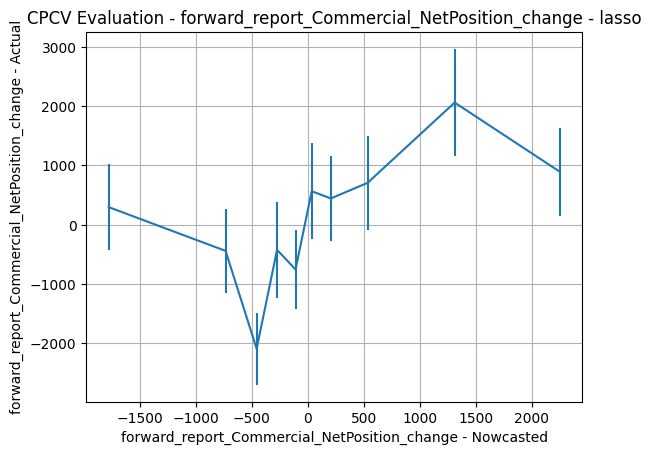

ridge: score=0.0797, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


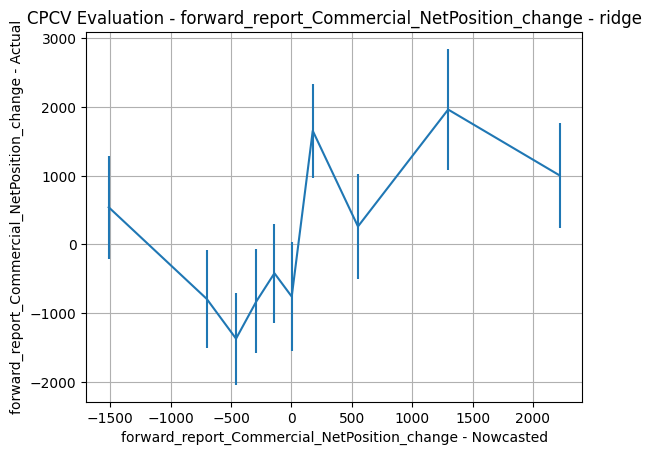

rf: score=0.0783, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}


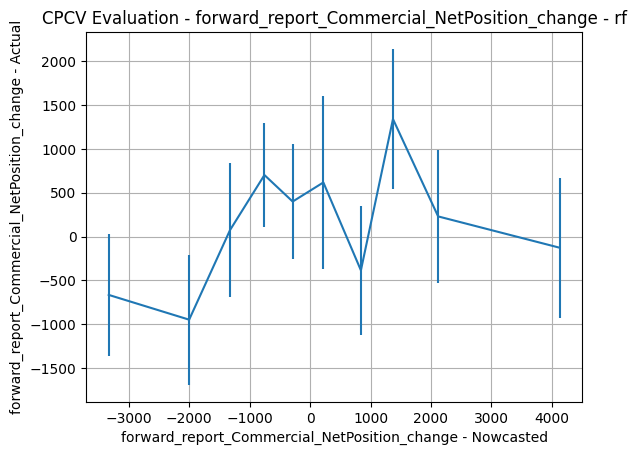

hgbm: score=0.0549, params={'model': 'hgbm', 'learning_rate': 0.2950581131879257, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.5844416873174643, 'max_leaf_nodes': 36}
{'learning_rate': 0.2950581131879257, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.5844416873174643, 'max_leaf_nodes': 36}


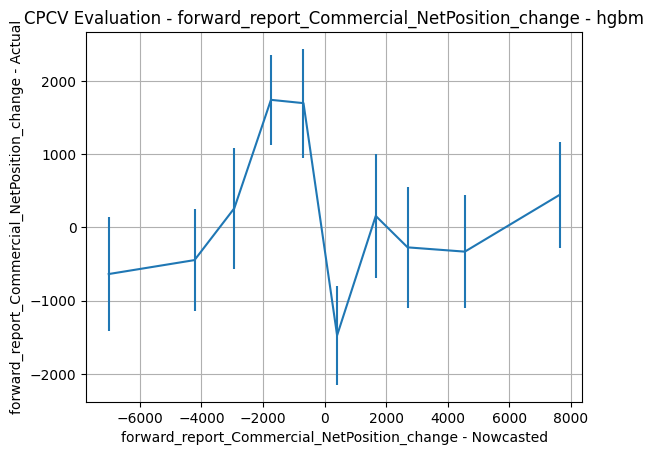

ols: score=0.0816, params={'model': 'ols'}
{}


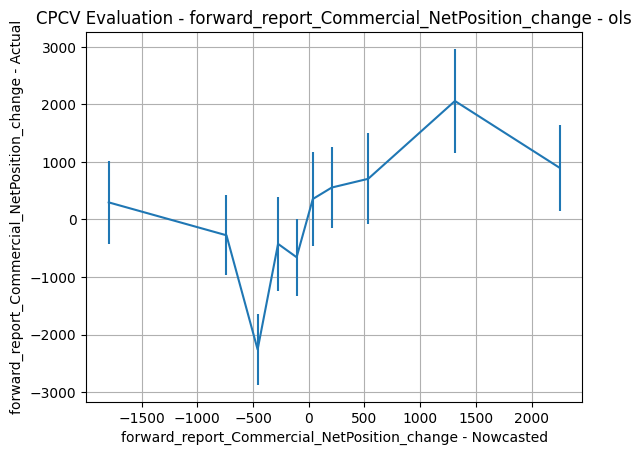

enet: score=-0.0087, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


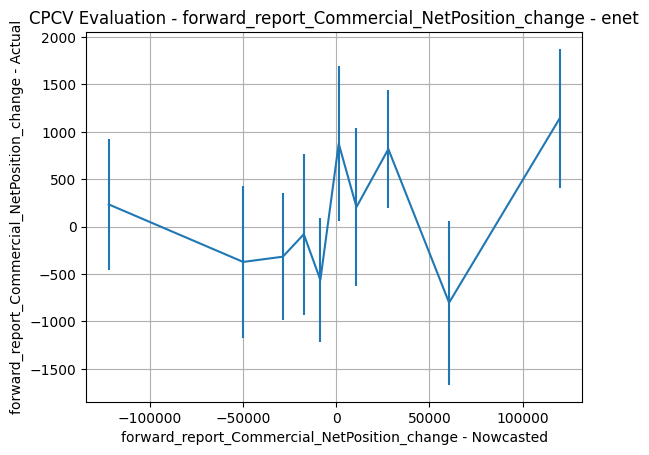

extra: score=0.0818, params={'model': 'extra', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


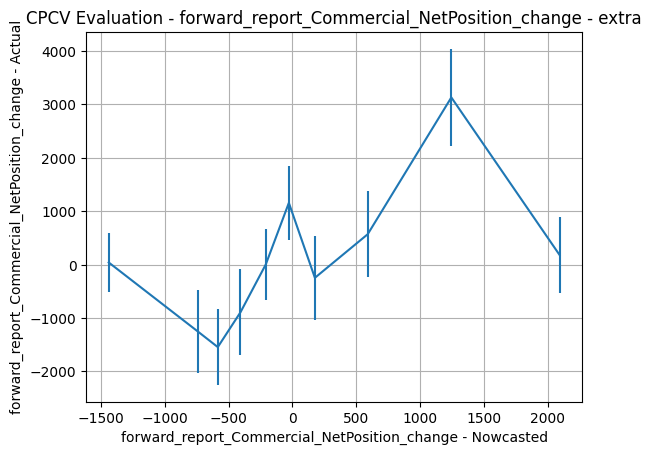

forward_report_CommercialLongPosition_change
lasso: score=0.3970, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
{'alpha': 1.261122987665929e-06}


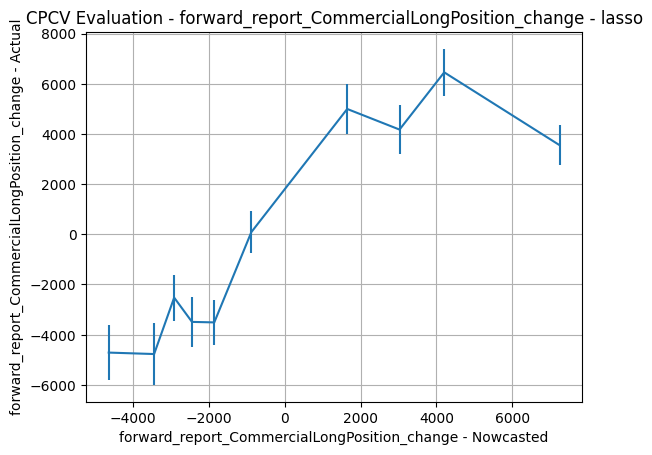

ridge: score=0.3943, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


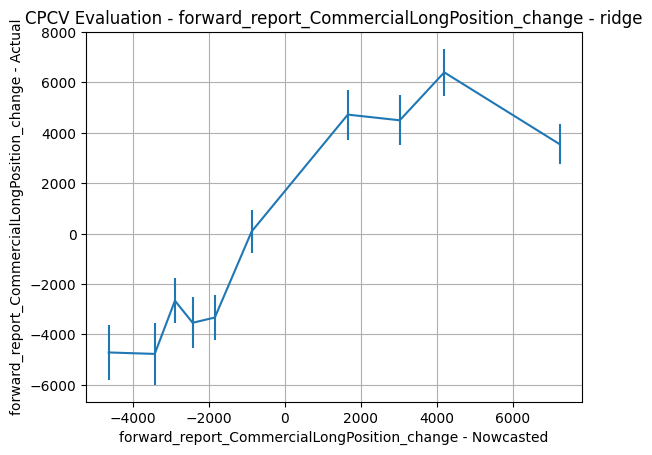

rf: score=0.4340, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


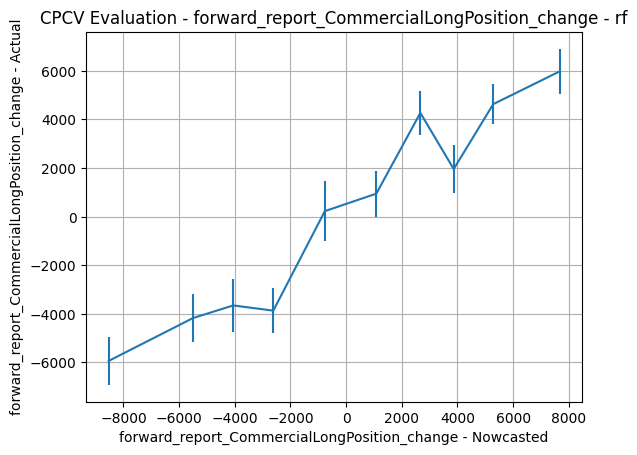

hgbm: score=0.3932, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


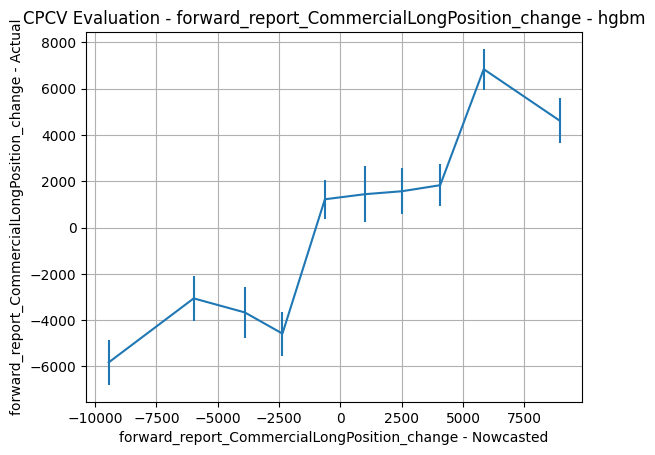

ols: score=0.3970, params={'model': 'ols'}
{}


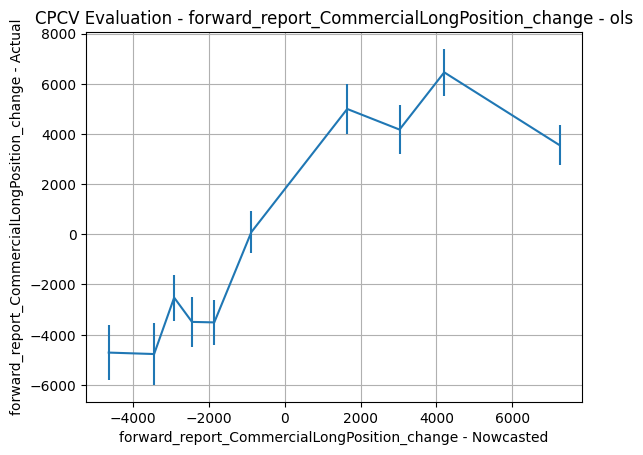

enet: score=0.3724, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


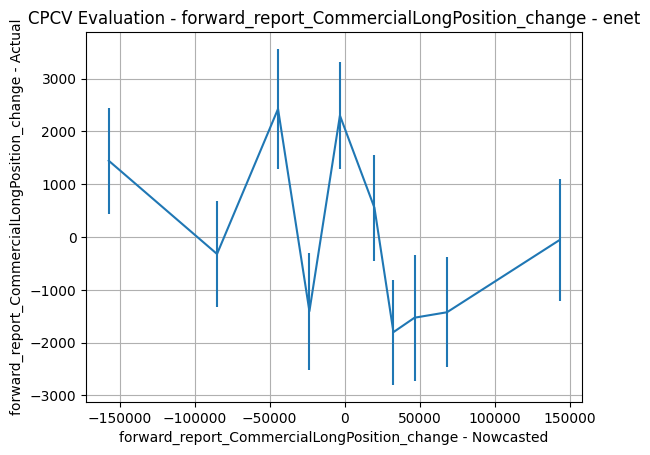

extra: score=0.4228, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


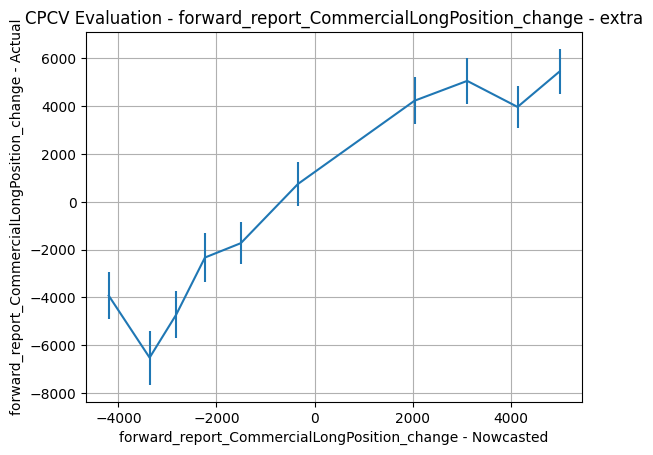

forward_report_CommercialShortPosition_change
lasso: score=0.3233, params={'model': 'lasso', 'alpha': 7.6134684452817964}
{'alpha': 7.6134684452817964}


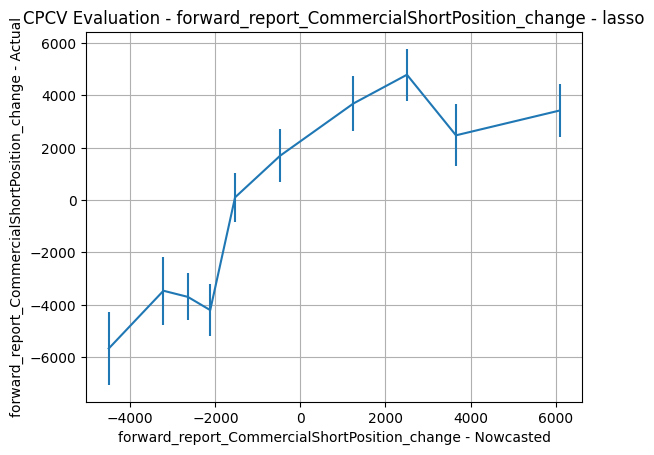

ridge: score=0.3175, params={'model': 'ridge', 'alpha': 181.09800695243965}
{'alpha': 181.09800695243965}


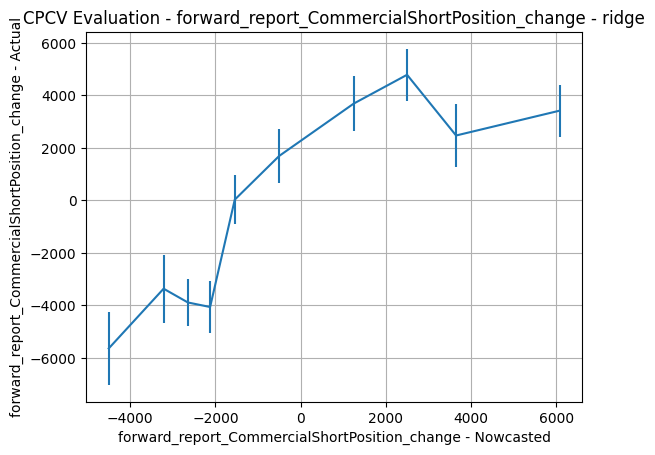

rf: score=0.3035, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}


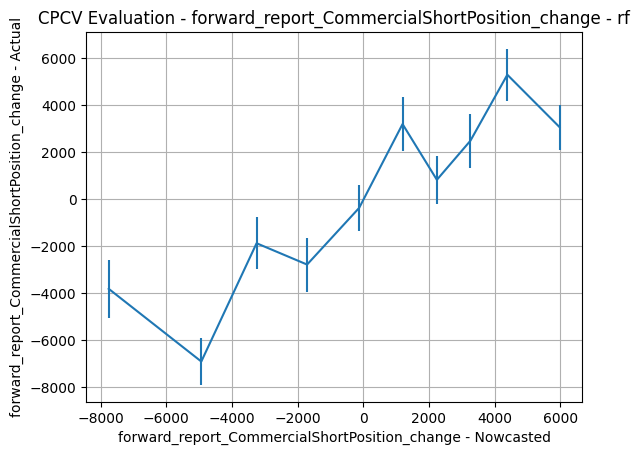

hgbm: score=0.2833, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


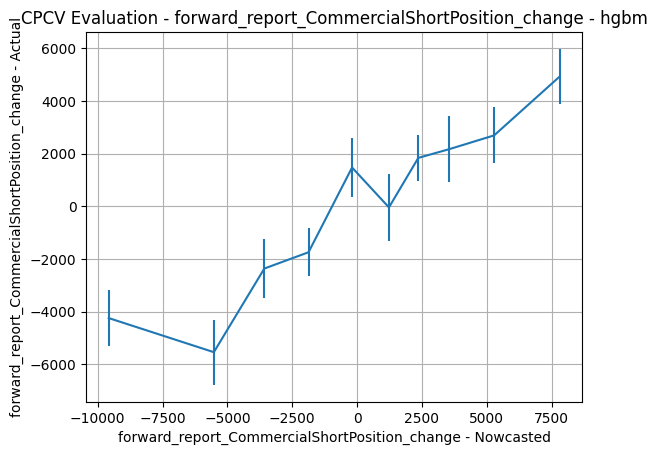

ols: score=0.3234, params={'model': 'ols'}
{}


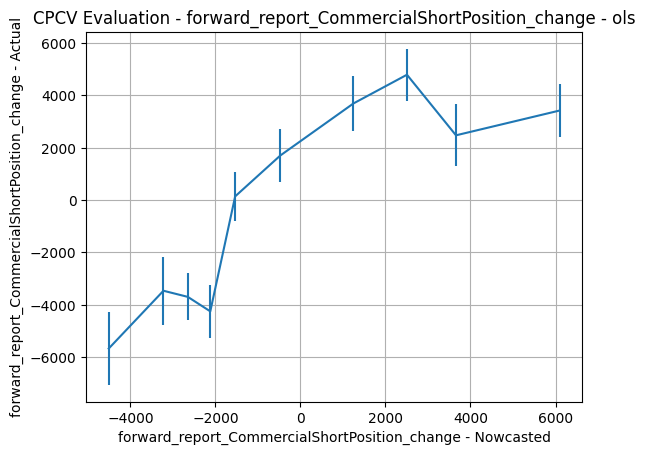

enet: score=0.2683, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


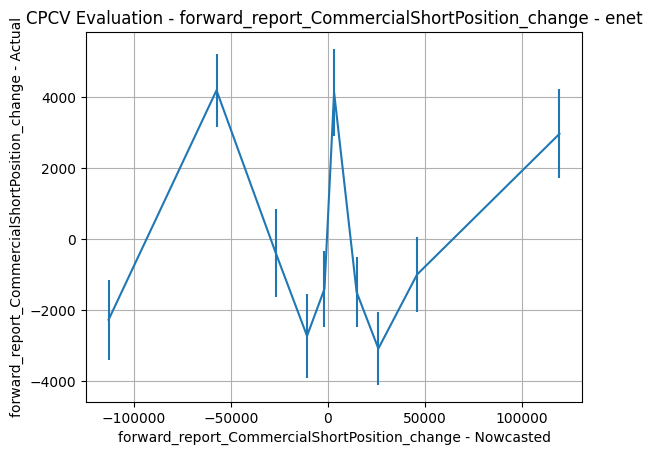

extra: score=0.2606, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


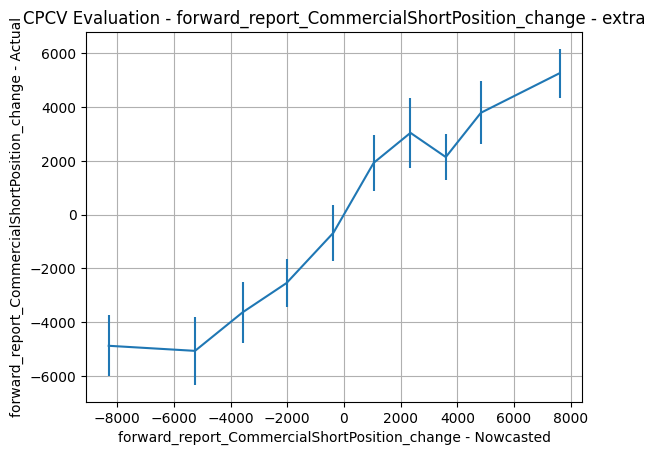

forward_Commercial_NetPosition_to_openinterest_change
lasso: score=-0.0412, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


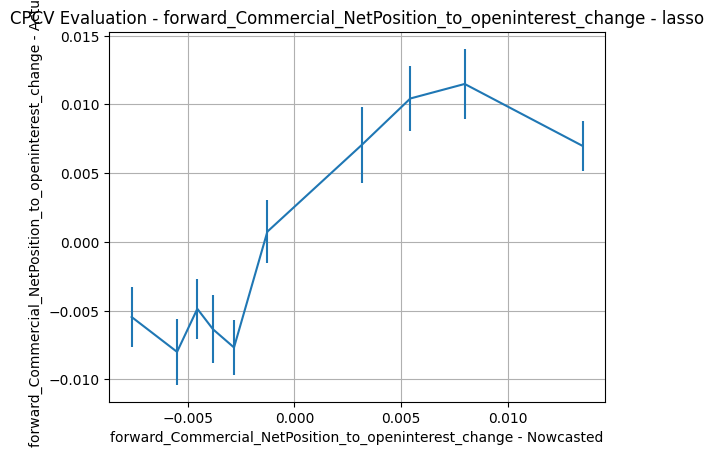

ridge: score=0.2995, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


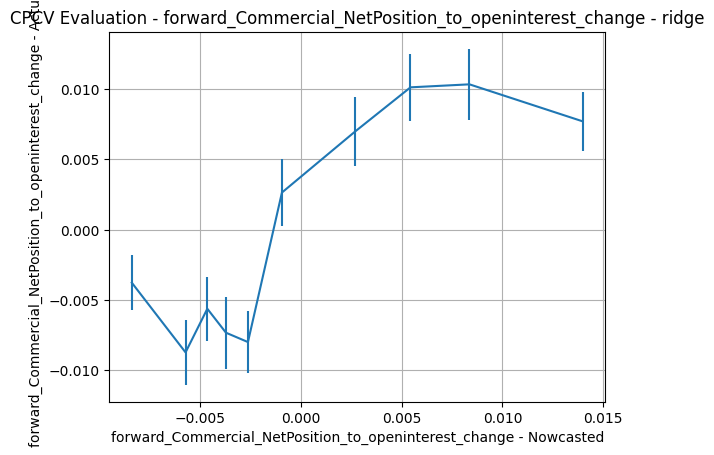

rf: score=0.3409, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}


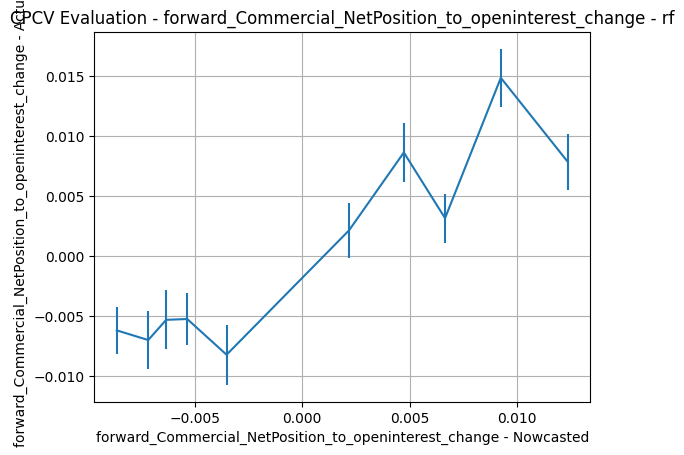

hgbm: score=0.2870, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


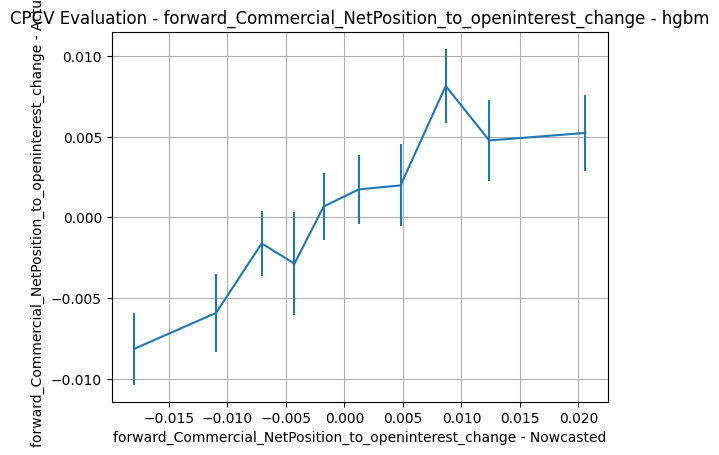

ols: score=0.3033, params={'model': 'ols'}
{}


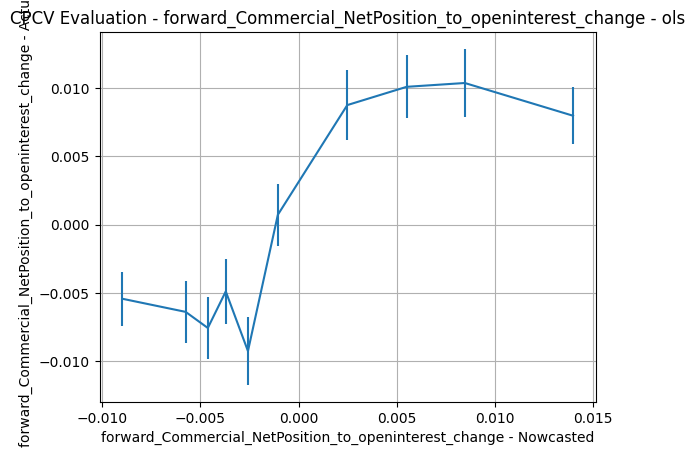

enet: score=0.0880, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


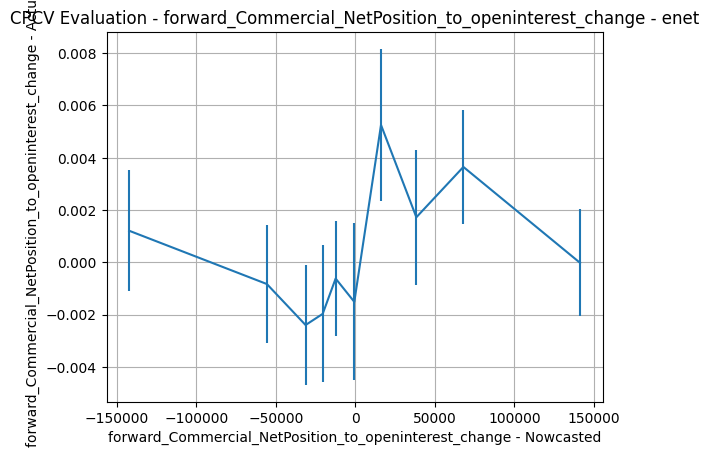

extra: score=0.3300, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


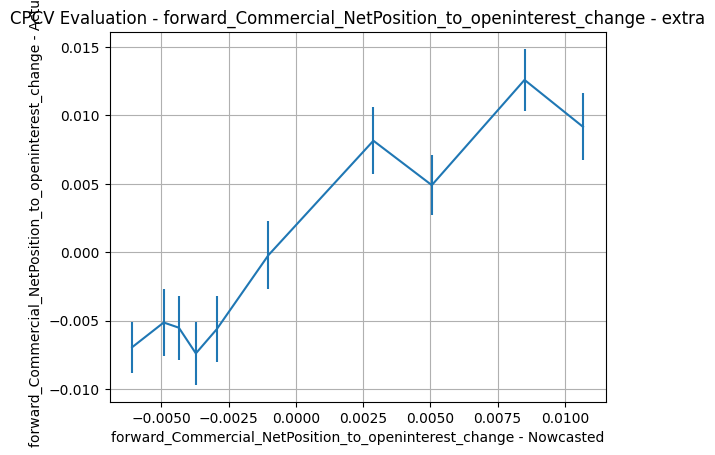

forward_CommercialLongPosition_to_openinterest_change
lasso: score=-0.0128, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


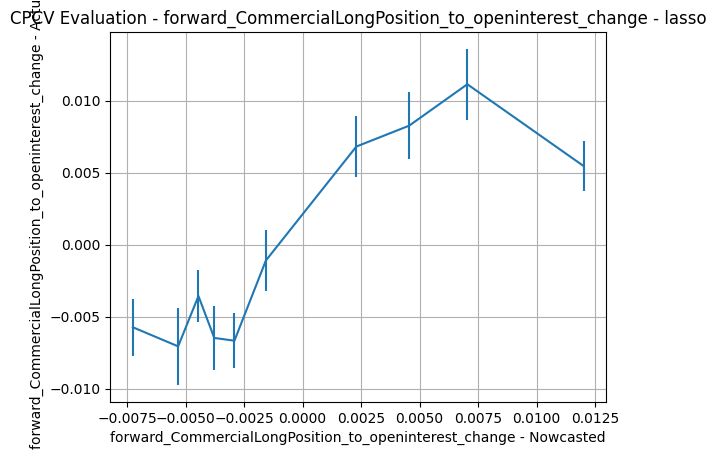

ridge: score=0.3020, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


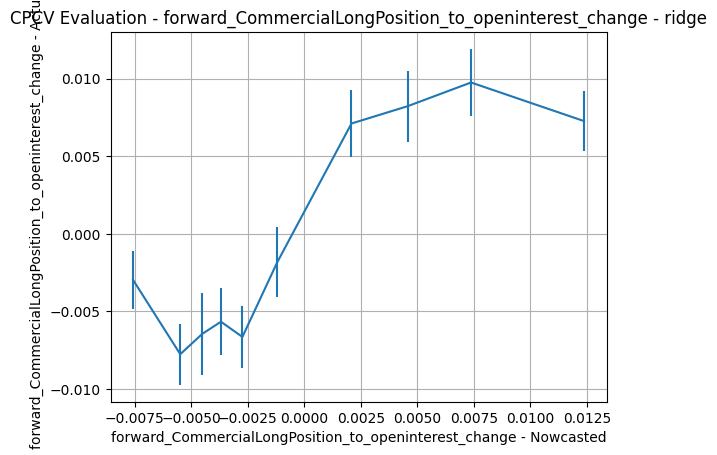

rf: score=0.3427, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


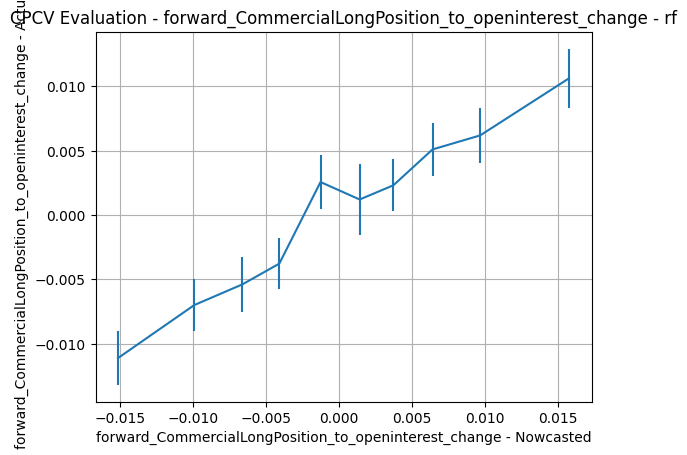

hgbm: score=0.3035, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


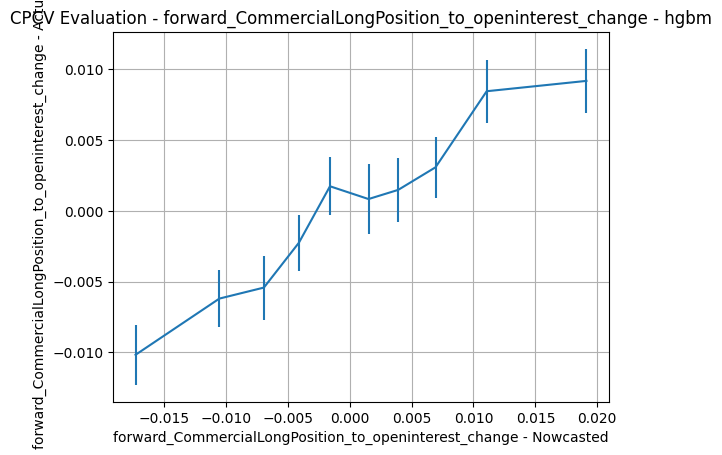

ols: score=0.3020, params={'model': 'ols'}
{}


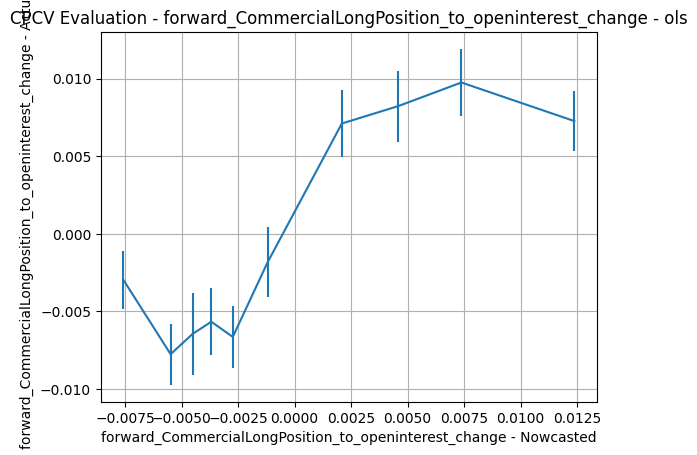

enet: score=-0.0139, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


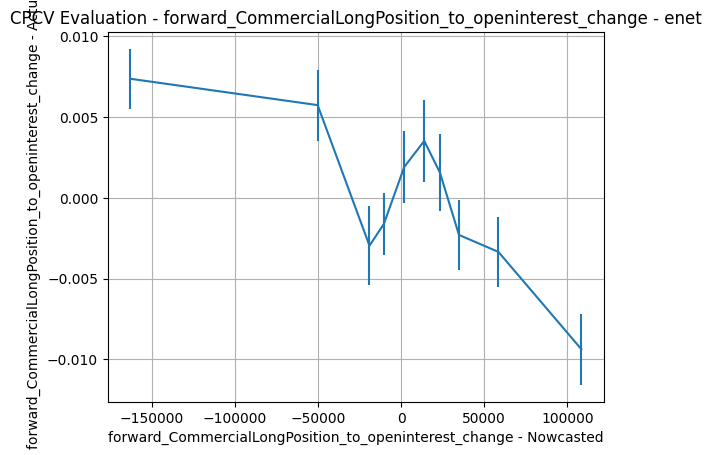

extra: score=0.3286, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


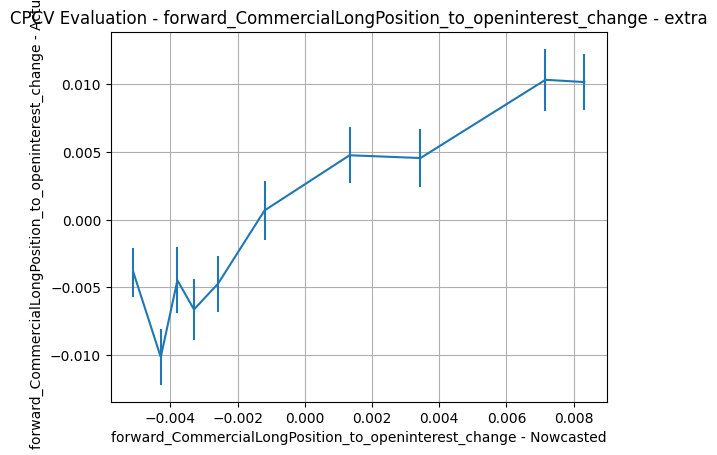

forward_CommercialShortPosition_to_openinterest_change
lasso: score=-0.0560, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


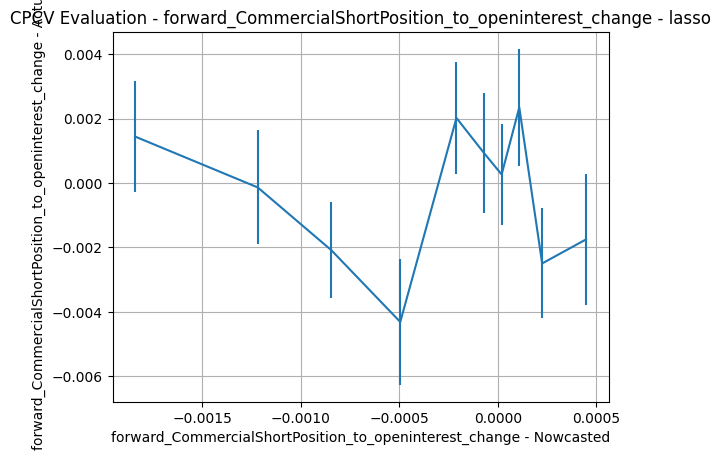

ridge: score=-0.0411, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


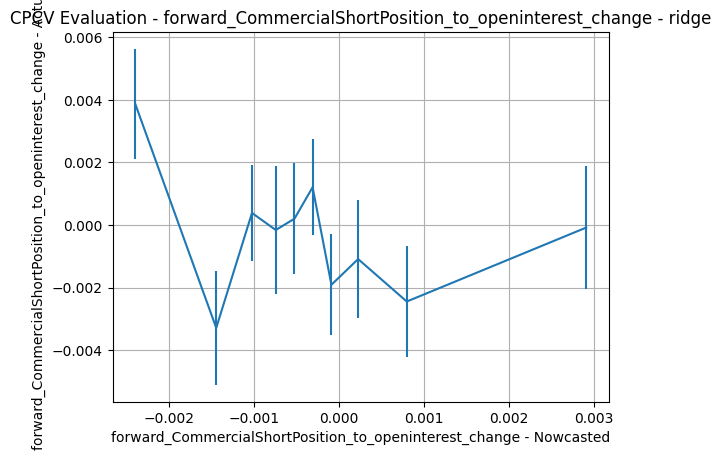

rf: score=0.0548, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}


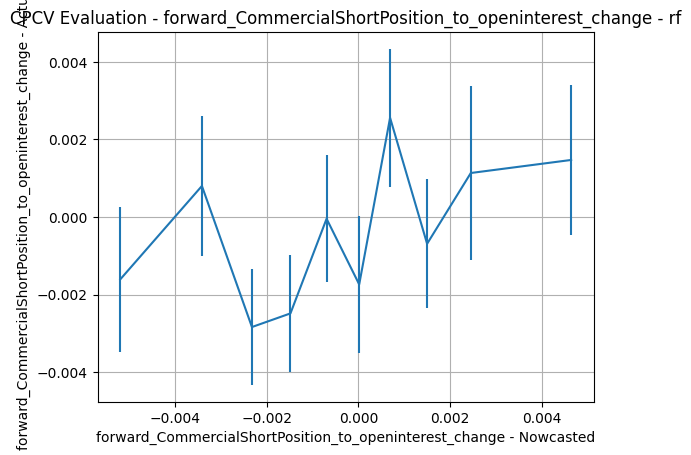

hgbm: score=0.0498, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
{'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}


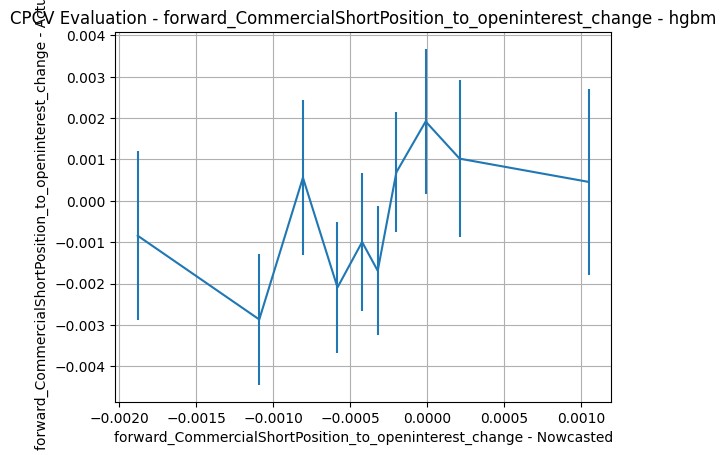

ols: score=-0.0411, params={'model': 'ols'}
{}


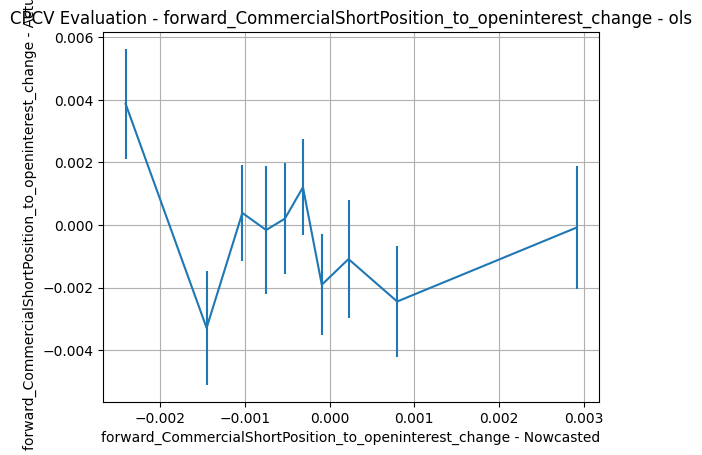

enet: score=-0.0520, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


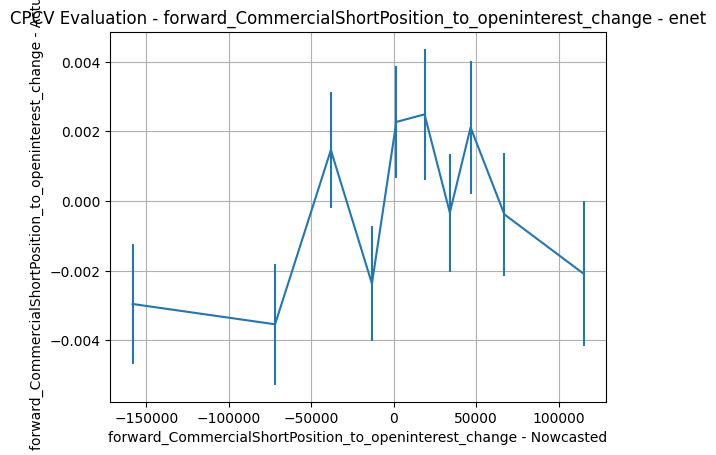

extra: score=0.0528, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}


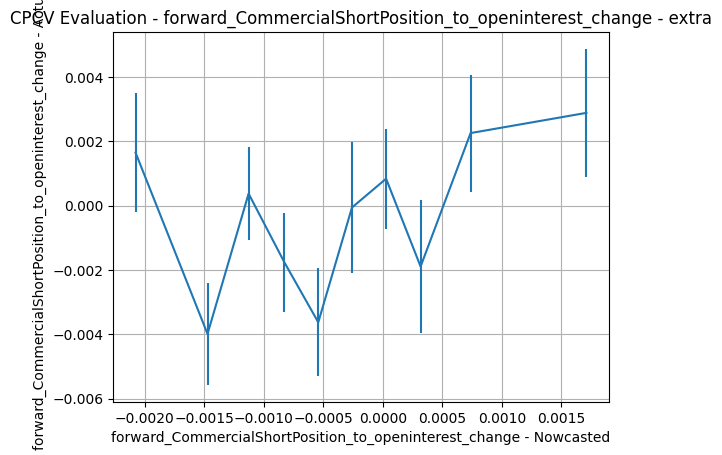

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_Commercial_NetPosition_change,0.068899,0.066334,0.030566,-0.005150,0.069117,0.044535,0.098380
forward_report_CommercialLongPosition_change,0.376570,0.376701,0.394200,0.377323,0.376570,-0.047241,0.424674
forward_report_CommercialShortPosition_change,0.291092,0.291263,0.305061,0.274797,0.291071,0.072818,0.321538
forward_Commercial_NetPosition_to_openinterest_change,0.290185,0.282805,0.320515,0.212609,0.282221,0.013271,0.318735
forward_CommercialLongPosition_to_openinterest_change,0.277884,0.279554,0.323871,0.286852,0.279554,-0.164301,0.318548
forward_CommercialShortPosition_to_openinterest_change,-0.009138,-0.041106,0.057445,0.049789,-0.041106,0.044530,0.053377


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
                    'model_name' : best_model_name, 
                    'params': best_model_params
        
    }
    

forward_report_Commercial_NetPosition_change
{'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
forward_report_CommercialLongPosition_change
{'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
forward_report_CommercialShortPosition_change
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
forward_Commercial_NetPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
forward_CommercialLongPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
forward_CommercialShortPosition_to_openinterest_change
{'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}


In [40]:
final_selected_model_and_parameters_per_response

{'forward_report_Commercial_NetPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 800,
   'max_depth': 6,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'forward_report_CommercialLongPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 600,
   'max_depth': 30,
   'min_samples_leaf': 5,
   'max_features': 'sqrt'}},
 'forward_report_CommercialShortPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 29,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'forward_Commercial_NetPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 3,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'forward_CommercialLongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 18,
   'min_samples_leaf': 2,
   'max_features': 'sqrt'}},
 'forward_CommercialShortPosition_to_openinterest_change': {'model_name': 'rf'

In [41]:
import json
with open("rbob_cot_comm_forecast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)